### Visualizations

### Injuries By Month

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import pandas as pd

In [5]:
df = pd.read_csv("../Data/injury_report_combined_years_v4.csv")
df

Name Team Pos Injury / Surgery Date  \
0         Chris Martin  BOS  RP               Jun '24   
1       Walker Buehler  LAD  SP              08/23/22   
2            Shane Baz  TBR  SP              09/28/22   
3      Lucas Gilbreath  COL  RP              03/14/23   
4         Cade Cavalli  WSN  SP              03/22/23   
...                ...  ...  ..                   ...   
4277        David Dahl  COL  OF              09/29/20   
4278       Bryan Abreu  HOU  RP              09/29/20   
4279  Justin Verlander  HOU  SP              09/30/20   
4280         Ken Giles  TOR  RP              09/30/20   
4281      Brad Peacock  HOU  RP              10/06/20   

                   Injury / Surgery     Status IL Retro Date  \
0                           Anxiety  Activated      06/02/24   
1                Tommy John surgery  Activated      03/17/24   
2                Tommy John surgery  Activated      03/25/24   
3                Tommy John surgery  Activated      03/25/24   
4                Tommy John surgery  60-Day IL      03/28/24   
...                             ...        ...           ...   
4277               Shoulder surgery  45-Day IL      09/21/20   
4278                    Undisclosed  45-Day IL      09/29/20   
4279             Tommy John surgery  10-Day IL      07/25/20   
4280             Tommy John surgery  10-Day IL      09/16/20   
4281  Arthroscopic shoulder surgery  10-Day IL      09/15/20   

     Eligible to Return Return Date            Latest Update  year  
0              06/17/24    06/18/24                Activated  2024  
1              04/07/24    05/06/24                Activated  2024  
2              04/09/24    05/23/24                Activated  2024  
3              05/24/24    08/16/24                Activated  2024  
4              05/27/24         NaN  No timetable for return  2024  
...                 ...         ...                      ...   ...  
4277           11/05/20    09/28/20      Out for 2020 season  2020  
4278           11/13/20    09/28/20      Out for 2020 season  2020  
4279           08/04/20    09/28/20      Out for 2020 season  2020  
4280           09/26/20    09/28/20      Out for 2020 season  2020  
4281           09/25/20    09/28/20  No timetable for return  2020  

[4282 rows x 11 columns]

In [8]:
### Droping rows with invaild dates 
file_path = "../Data/injury_report_combined_years_v4.csv"
df = pd.read_csv(file_path)
date_format = "%Y-%m-%d" 
df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], format=date_format, errors='coerce')
invalid_dates = df[df['Injury / Surgery Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates.head())
df_cleaned = df.dropna(subset=['Injury / Surgery Date'])

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "injury_report_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Rows with invalid dates:
              Name Team Pos Injury / Surgery Date    Injury / Surgery  \
0     Chris Martin  BOS  RP                   NaT             Anxiety   
1   Walker Buehler  LAD  SP                   NaT  Tommy John surgery   
2        Shane Baz  TBR  SP                   NaT  Tommy John surgery   
3  Lucas Gilbreath  COL  RP                   NaT  Tommy John surgery   
4     Cade Cavalli  WSN  SP                   NaT  Tommy John surgery   

      Status IL Retro Date Eligible to Return Return Date  \
0  Activated      06/02/24           06/17/24    06/18/24   
1  Activated      03/17/24           04/07/24    05/06/24   
2  Activated      03/25/24           04/09/24    05/23/24   
3  Activated      03/25/24           05/24/24    08/16/24   
4  60-Day IL      03/28/24           05/27/24         NaN   

             Latest Update  year  
0                Activated  2024  
1                Activated  2024  
2                Activated  2024  
3                Activated  2

In [7]:
### cleaning the data and showing the new cleaned data
file_path = "../Data/injury_report_combined_years_v4.csv"
df = pd.read_csv(file_path)
print("Original data preview:")
print(df.head())
print("\nUnique values in 'Injury / Surgery Date':")
print(df['Injury / Surgery Date'].unique())
df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')

# Check for rows with invalid dates
invalid_dates = df[df['Injury / Surgery Date'].isna()]
print("\nRows with invalid dates:")
print(invalid_dates)

# Drop rows with invalid dates
df_cleaned = df.dropna(subset=['Injury / Surgery Date'])

print("\nCleaned data preview:")
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

# cleaned file contains data
df_check = pd.read_csv(cleaned_file_path)
print("\nData from cleaned file:")
print(df_check.head())


Original data preview:
              Name Team Pos Injury / Surgery Date    Injury / Surgery  \
0     Chris Martin  BOS  RP               Jun '24             Anxiety   
1   Walker Buehler  LAD  SP              08/23/22  Tommy John surgery   
2        Shane Baz  TBR  SP              09/28/22  Tommy John surgery   
3  Lucas Gilbreath  COL  RP              03/14/23  Tommy John surgery   
4     Cade Cavalli  WSN  SP              03/22/23  Tommy John surgery   

      Status IL Retro Date Eligible to Return Return Date  \
0  Activated      06/02/24           06/17/24    06/18/24   
1  Activated      03/17/24           04/07/24    05/06/24   
2  Activated      03/25/24           04/09/24    05/23/24   
3  Activated      03/25/24           05/24/24    08/16/24   
4  60-Day IL      03/28/24           05/27/24         NaN   

             Latest Update  year  
0                Activated  2024  
1                Activated  2024  
2                Activated  2024  
3                Activated  202

<ipython-input-7-3f22235cc580>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Injury / Surgery Date'] = pd.to_datetime(df['Injury / Surgery Date'], errors='coerce')


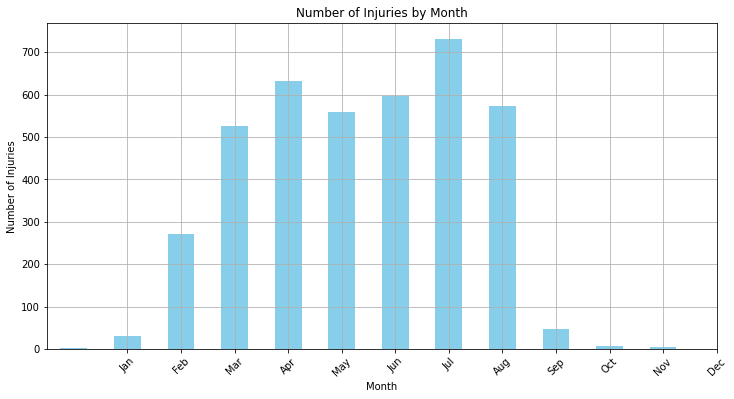

In [9]:
### Graphing the injuries by month 
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')

# Extract month and year from the 'Injury / Surgery Date'
df_cleaned['Month'] = df_cleaned['Injury / Surgery Date'].dt.month
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Group by month and count the number of injuries
monthly_injuries = df_cleaned.groupby('Month').size()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_injuries.plot(kind='bar', color='skyblue')
plt.title('Number of Injuries by Month')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(True)
plt.show()

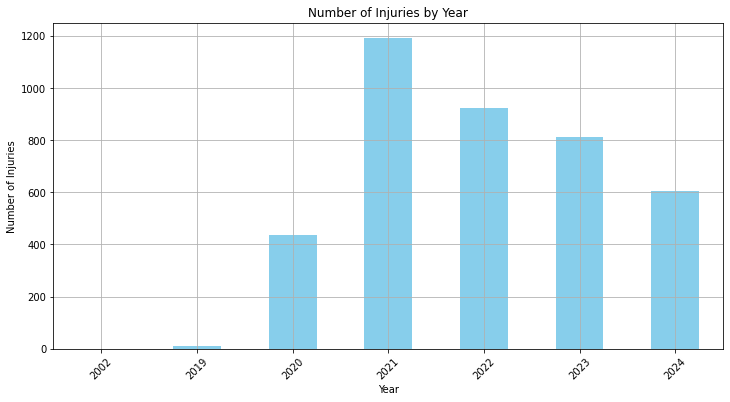

In [10]:
### Graphing injuries by year
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Group by year and count the number of injuries
yearly_injuries = df_cleaned.groupby('Year').size()

# Plotting the data
plt.figure(figsize=(12, 6))
yearly_injuries.plot(kind='bar', color='skyblue')
plt.title('Number of Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

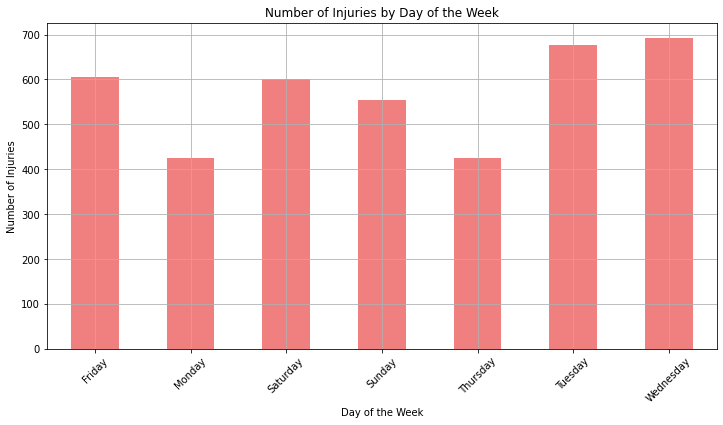

In [11]:
### injuries by day of week
df_cleaned['Day of Week'] = df_cleaned['Injury / Surgery Date'].dt.day_name()
weekly_injuries = df_cleaned.groupby('Day of Week').size()

plt.figure(figsize=(12, 6))
weekly_injuries.plot(kind='bar', color='lightcoral')
plt.title('Number of Injuries by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Specific injuries on the body

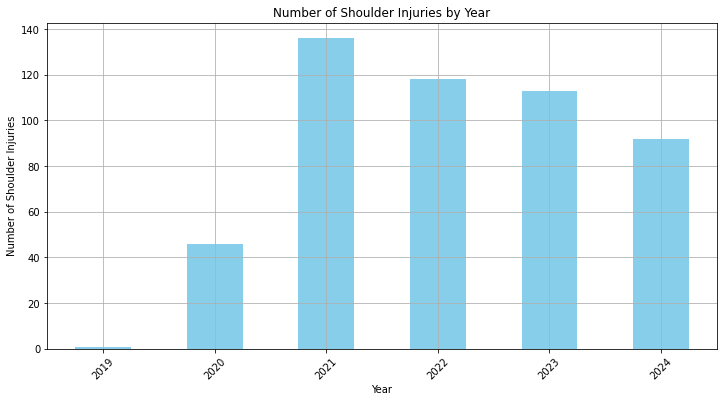

In [12]:
### Shoulder
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Convert 'Injury / Surgery Date' to datetime
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')

# Filter for shoulder injuries
shoulder_injuries = df_cleaned[df_cleaned['Injury / Surgery'].str.contains('shoulder', case=False, na=False)].copy()
shoulder_injuries.loc[:, 'Year'] = shoulder_injuries['Injury / Surgery Date'].dt.year

# Count the number of shoulder injuries by year
shoulder_injuries_by_year = shoulder_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
shoulder_injuries_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Shoulder Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shoulder Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3072366249.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


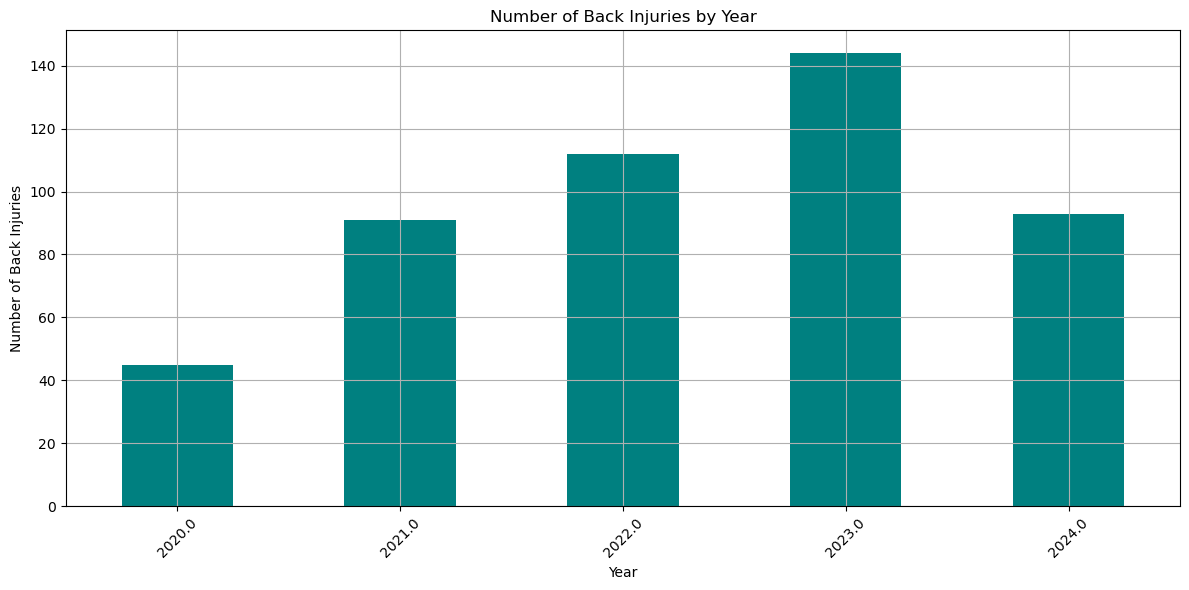

In [36]:
### Back injury
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "back"
back_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('back', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
back_injuries['Year'] = back_injuries['Injury / Surgery Date'].dt.year

# Count the number of back injuries by year
back_injuries_by_year = back_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
back_injuries_by_year.plot(kind='bar', color='teal')
plt.title('Number of Back Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Back Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\1893203972.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


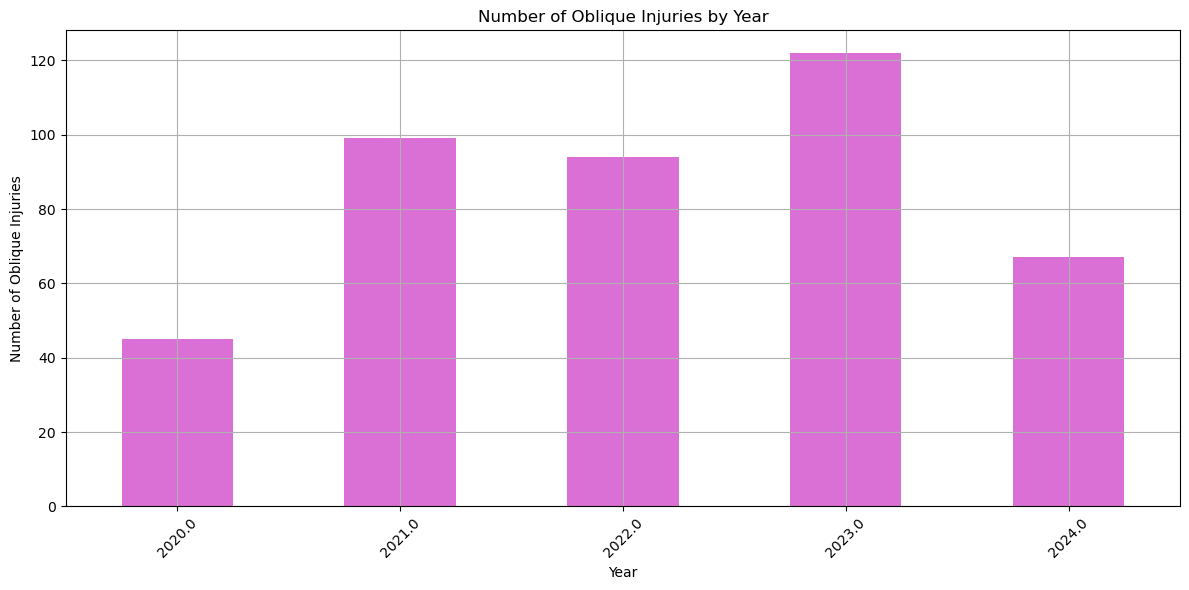

In [37]:
### Oblique Surgery // An oblique injury is a strain or tear to the oblique muscles in the abdomen, which are located between the lower ribs and pelvis.
### Oblique injuries are also known as side strains or intercostal muscle strains
# Load both CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "oblique"
oblique_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('oblique', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
oblique_injuries['Year'] = oblique_injuries['Injury / Surgery Date'].dt.year

# Count the number of oblique injuries by year
oblique_injuries_by_year = oblique_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
oblique_injuries_by_year.plot(kind='bar', color='orchid')
plt.title('Number of Oblique Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Oblique Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\548517395.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


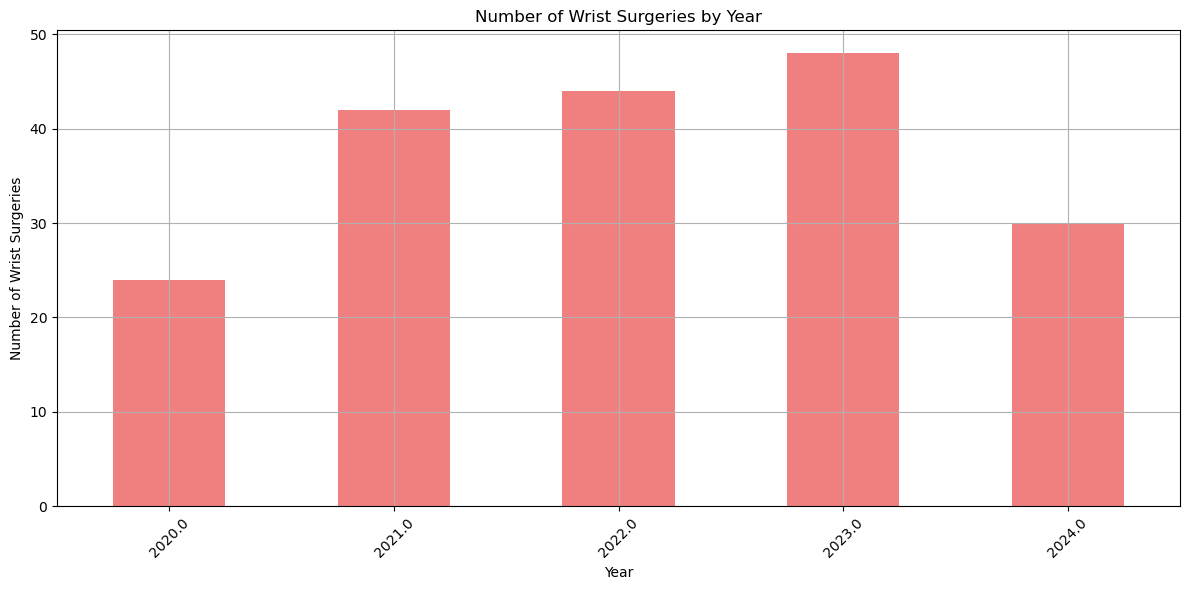

In [29]:
### Wrist surgery
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "wrist"
wrist_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('wrist', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
wrist_injuries['Year'] = wrist_injuries['Injury / Surgery Date'].dt.year

# Count the number of wrist surgeries by year
wrist_injuries_by_year = wrist_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
wrist_injuries_by_year.plot(kind='bar', color='lightcoral')
plt.title('Number of Wrist Surgeries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wrist Surgeries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\2310836891.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


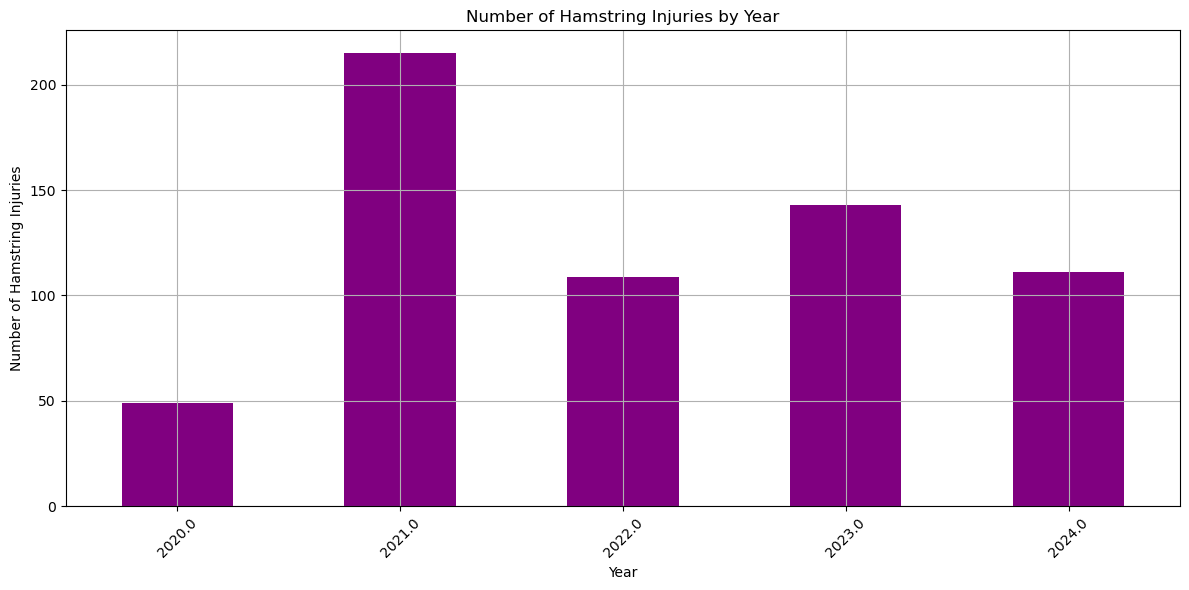

In [32]:
### Hamstring surgery
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "hamstring"
hamstring_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('hamstring', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
hamstring_injuries['Year'] = hamstring_injuries['Injury / Surgery Date'].dt.year

# Count the number of hamstring injuries by year
hamstring_injuries_by_year = hamstring_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
hamstring_injuries_by_year.plot(kind='bar', color='purple')
plt.title('Number of Hamstring Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Hamstring Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\4222955478.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


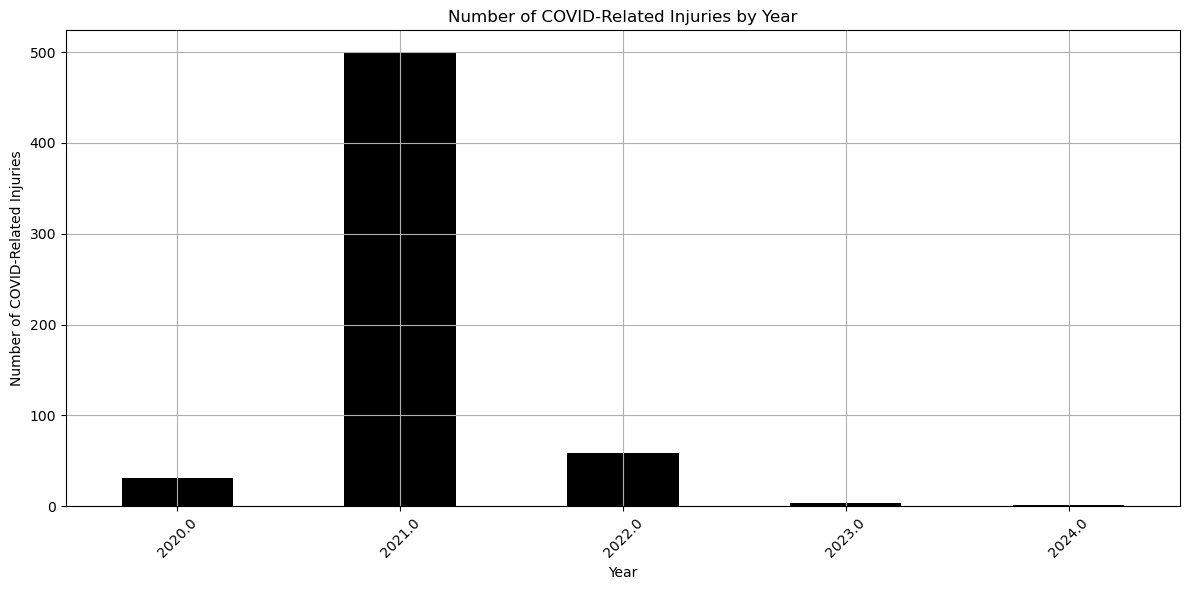

In [33]:
### covid 
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "COVID"
covid_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('covid', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
covid_injuries['Year'] = covid_injuries['Injury / Surgery Date'].dt.year

# Count the number of COVID-related injuries by year
covid_injuries_by_year = covid_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
covid_injuries_by_year.plot(kind='bar', color='black')
plt.title('Number of COVID-Related Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of COVID-Related Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3017689485.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


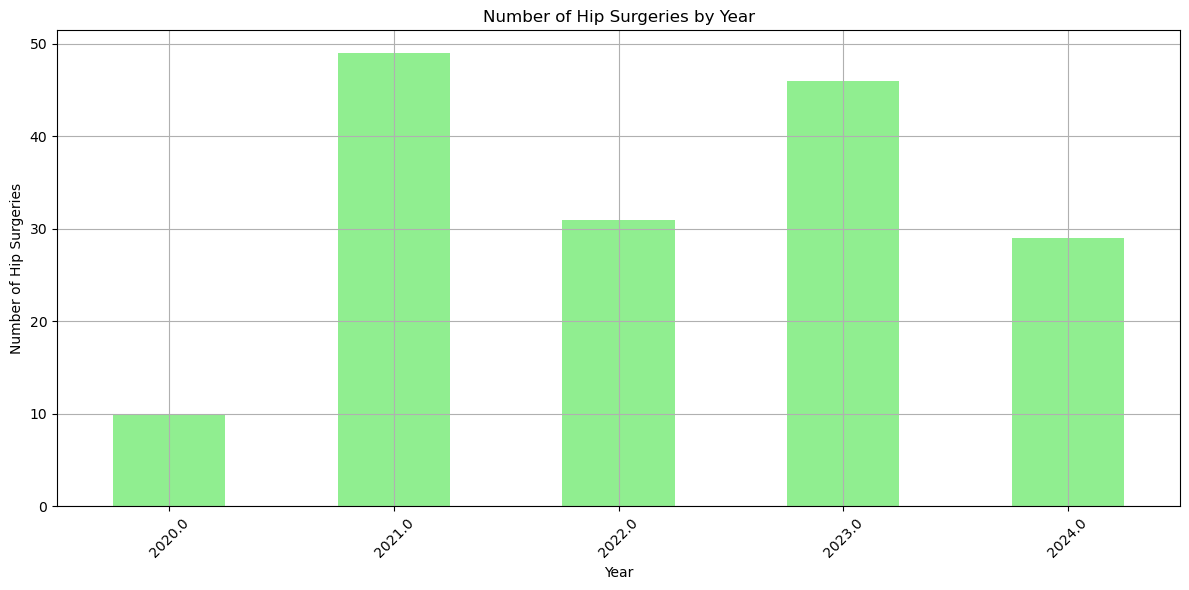

In [27]:
### Hip Surgeries
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "hip"
hip_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('hip', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
hip_injuries['Year'] = hip_injuries['Injury / Surgery Date'].dt.year

# Count the number of hip surgeries by year
hip_injuries_by_year = hip_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
hip_injuries_by_year.plot(kind='bar', color='lightgreen')
plt.title('Number of Hip Surgeries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Hip Surgeries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3449959920.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


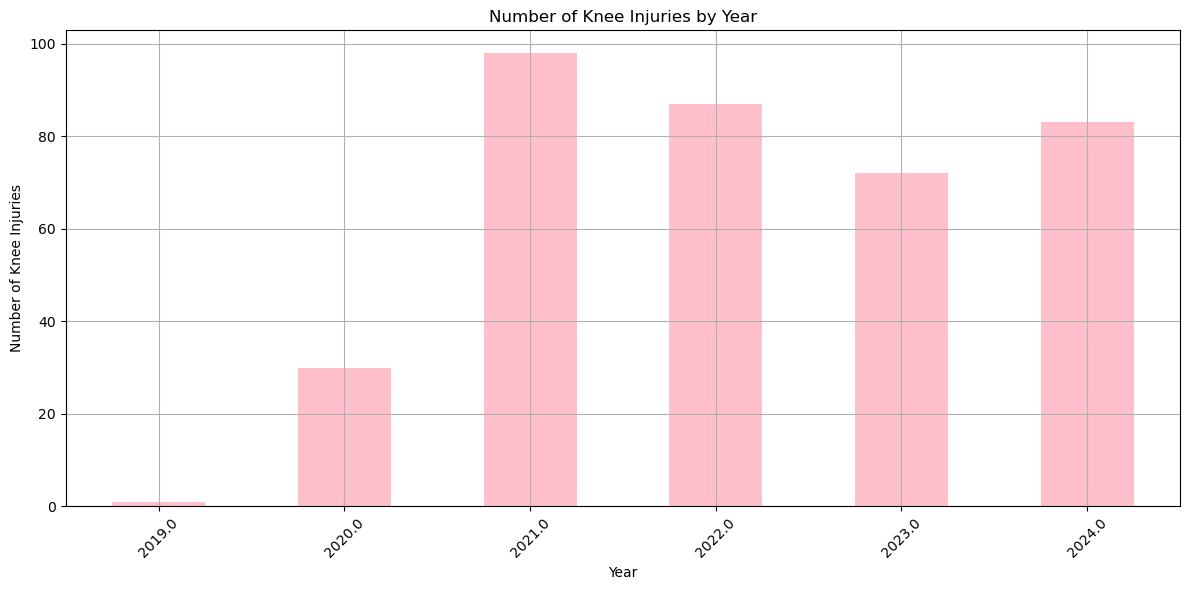

In [35]:
### Knee
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for any injury or surgery that mentions "knee"
knee_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('knee', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
knee_injuries['Year'] = knee_injuries['Injury / Surgery Date'].dt.year

# Count the number of knee injuries by year
knee_injuries_by_year = knee_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
knee_injuries_by_year.plot(kind='bar', color='pink')
plt.title('Number of Knee Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Knee Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\2654427498.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


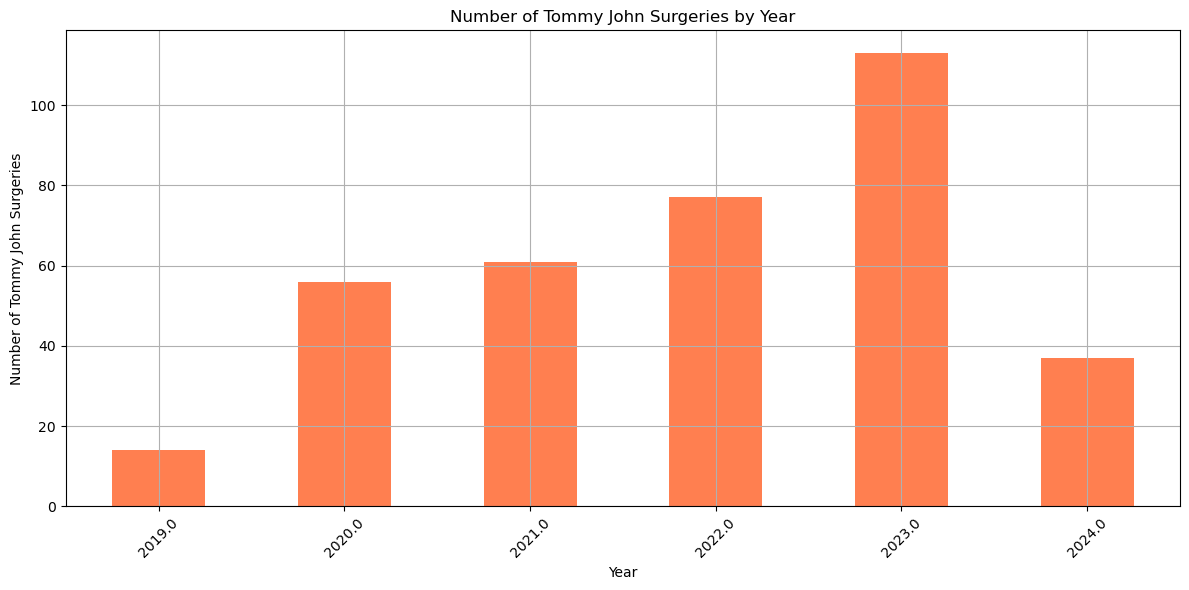

In [25]:
### Tommy John Surgeries // UCL elbow surgery
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Filter for Tommy John surgeries
tommy_john_injuries = combined_df[combined_df['Injury / Surgery'].str.contains('tommy john', case=False, na=False)].copy()

# Extract year from 'Injury / Surgery Date'
tommy_john_injuries['Year'] = tommy_john_injuries['Injury / Surgery Date'].dt.year

# Count the number of Tommy John surgeries by year
tommy_john_injuries_by_year = tommy_john_injuries['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
tommy_john_injuries_by_year.plot(kind='bar', color='coral')
plt.title('Number of Tommy John Surgeries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Tommy John Surgeries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

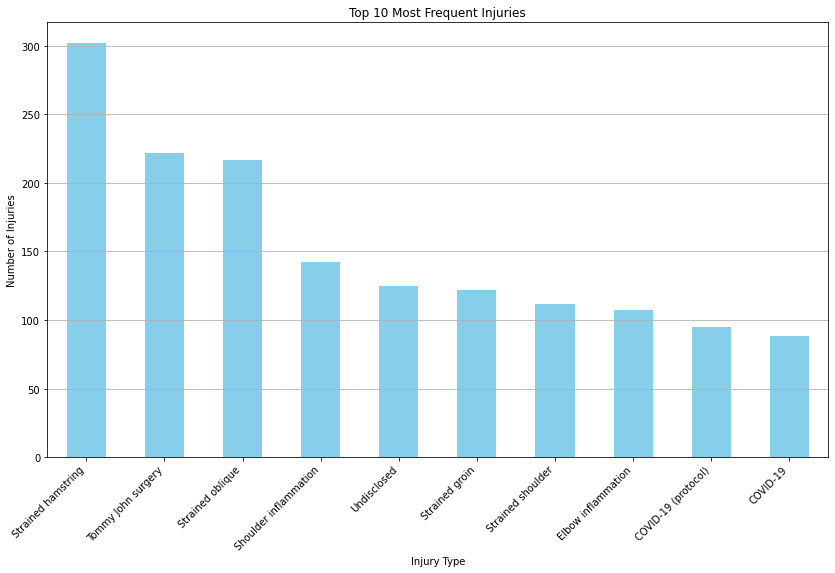

In [13]:
# cleaned CSV file
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Count the frequency of each injury type
injury_counts = df_cleaned['Injury / Surgery'].value_counts()

# Get the top 10 injuries
top_10_injuries = injury_counts.head(10)

# Plotting the data
plt.figure(figsize=(14, 8))
top_10_injuries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Injuries')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

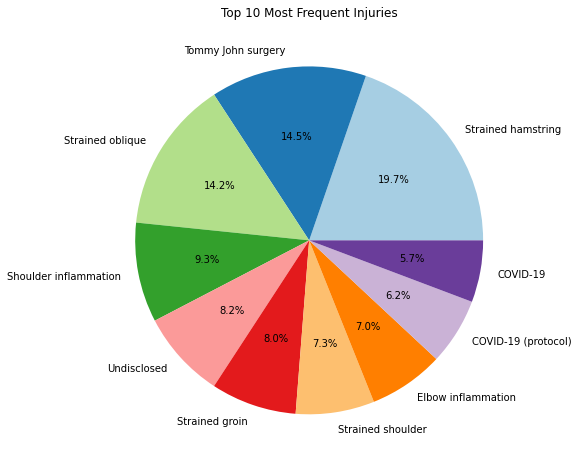

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Count the frequency of each injury type
injury_counts = df_cleaned['Injury / Surgery'].value_counts()

# Get the top 10 injuries
top_10_injuries = injury_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_10_injuries, labels=top_10_injuries.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_10_injuries))))
plt.title('Top 10 Most Frequent Injuries')
plt.show()

### Most Frequent Injuries 

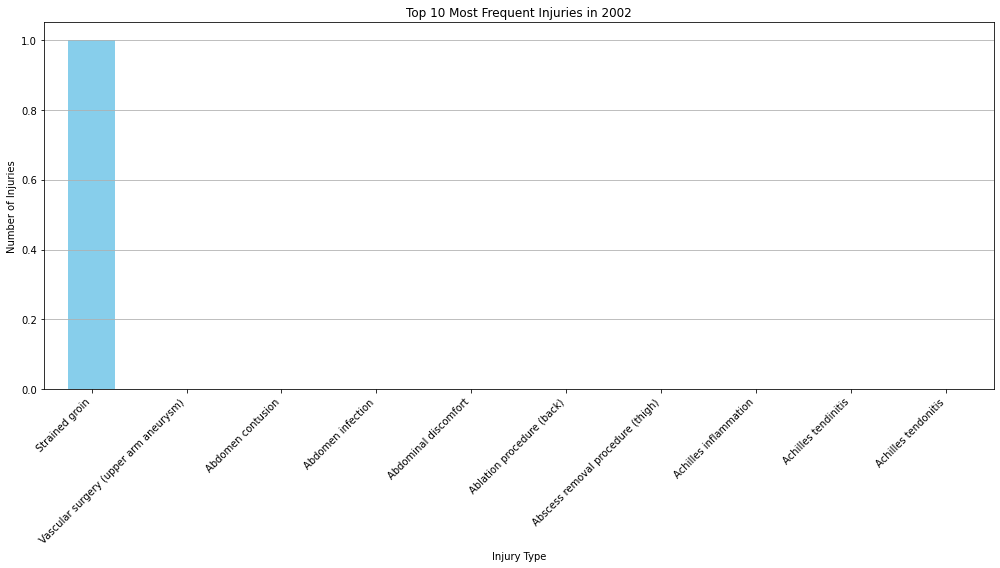

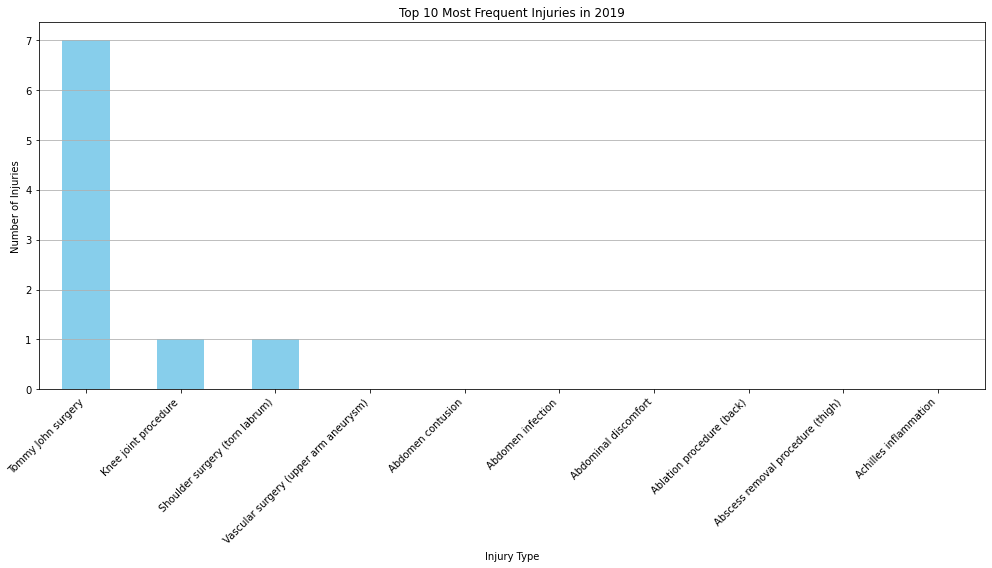

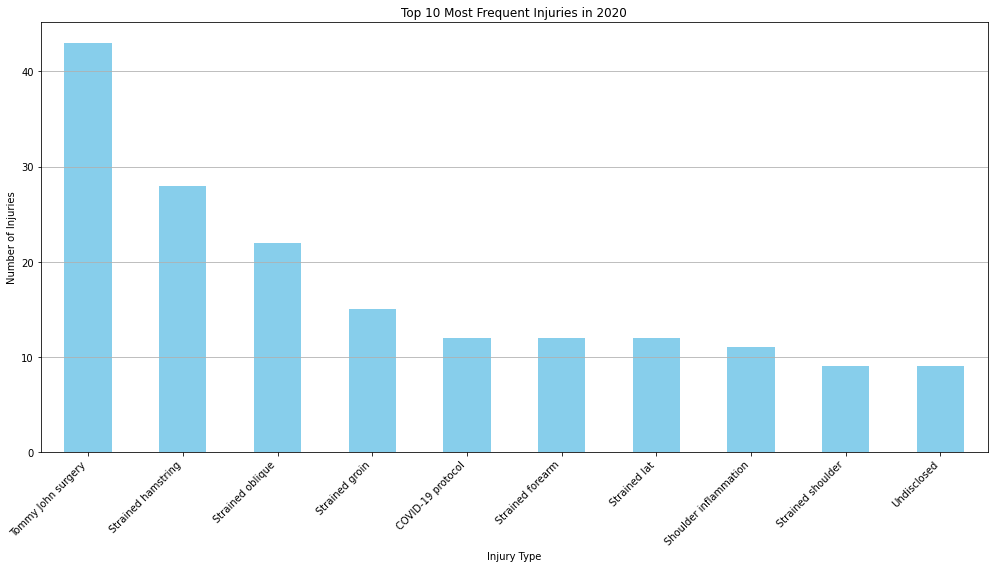

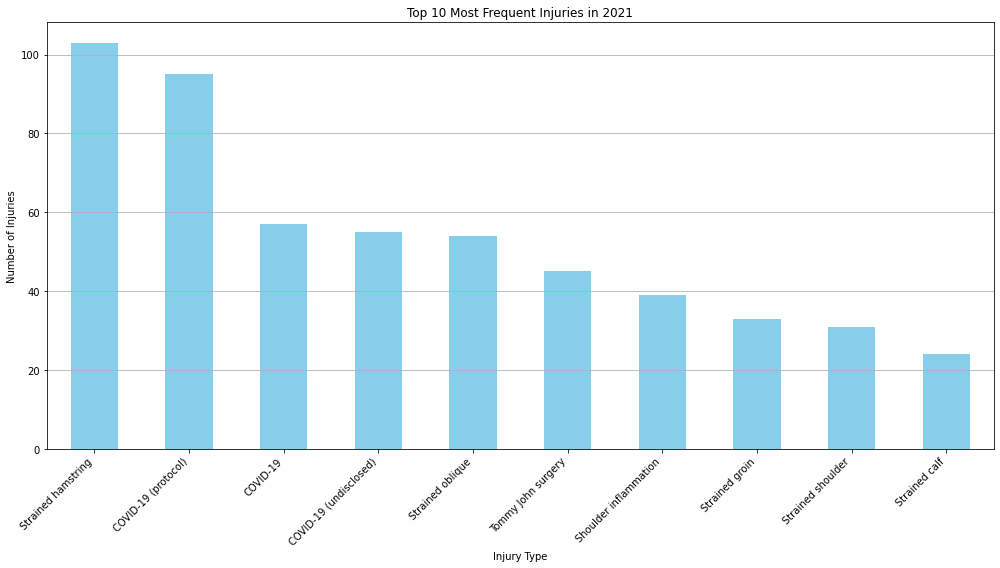

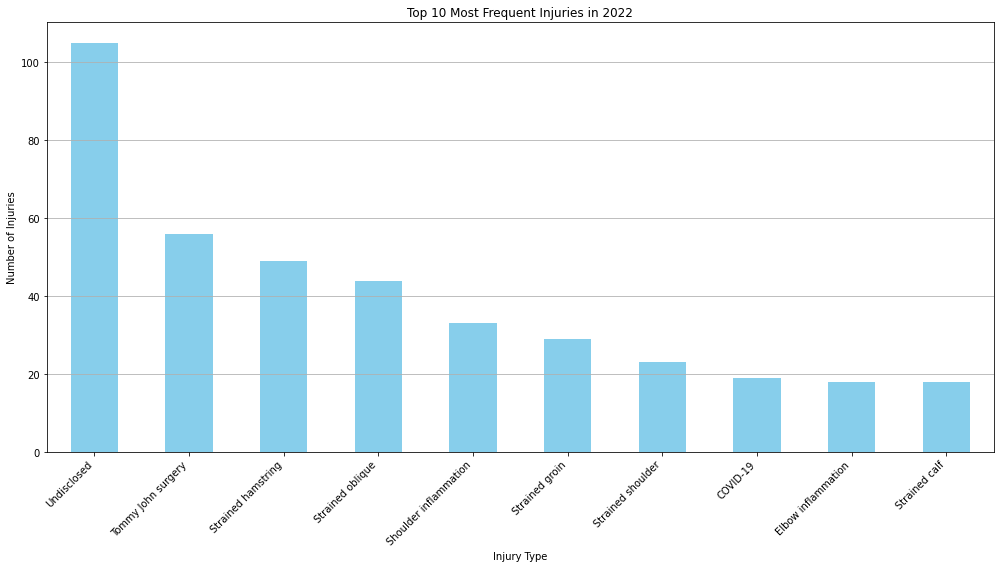

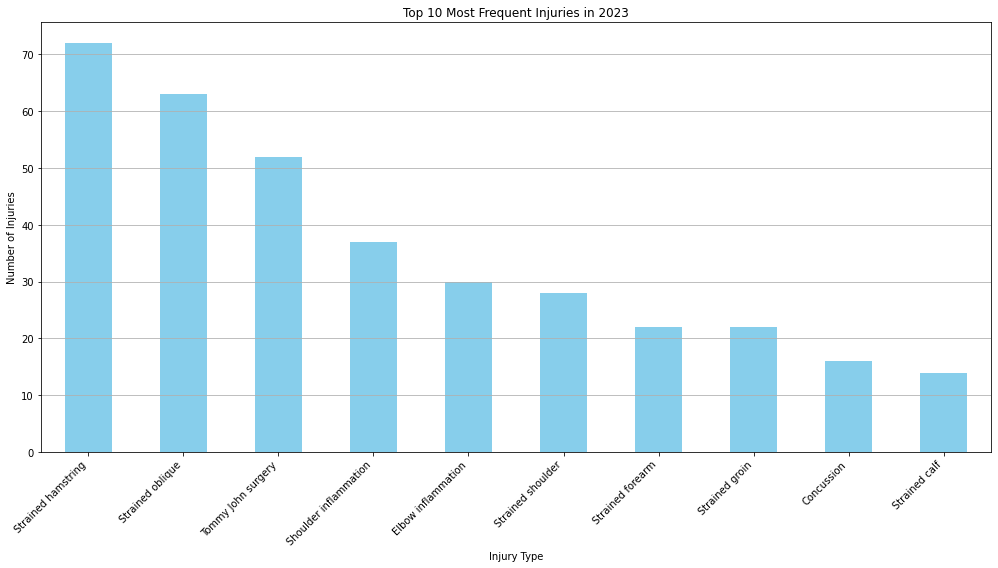

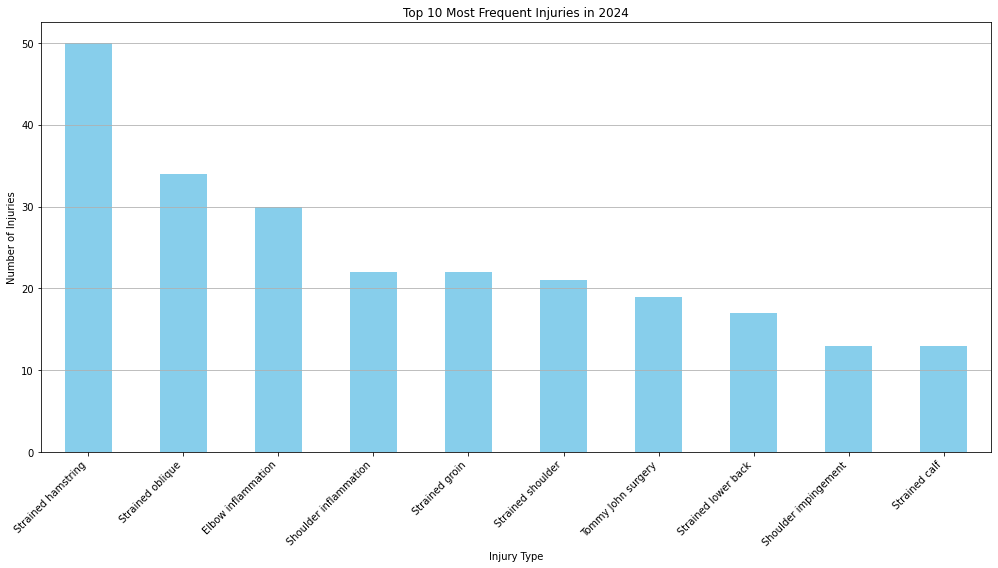

In [15]:
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Count the frequency of each injury type for each year
injury_counts_by_year = df_cleaned.groupby('Year')['Injury / Surgery'].value_counts().unstack()

# Plot the top 10 injuries for each year
for year in injury_counts_by_year.index:
    # Get the injury counts for the current year
    injury_counts = injury_counts_by_year.loc[year]
    
    # Get the top 10 injuries
    top_10_injuries = injury_counts.nlargest(10)
    
    # Plotting the data
    plt.figure(figsize=(14, 8))
    top_10_injuries.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Most Frequent Injuries in {year}')
    plt.xlabel('Injury Type')
    plt.ylabel('Number of Injuries')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

<Figure size 1008x576 with 0 Axes>

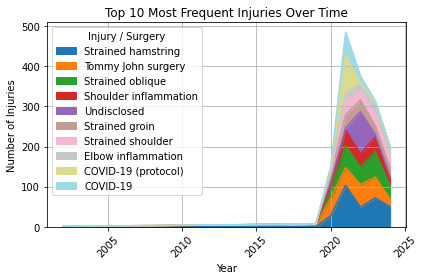

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_file_path = "../Data/injury_report_cleaned.csv"
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned['Injury / Surgery Date'] = pd.to_datetime(df_cleaned['Injury / Surgery Date'], errors='coerce')
df_cleaned['Year'] = df_cleaned['Injury / Surgery Date'].dt.year

# Count the frequency of each injury type for each year
injury_counts_by_year = df_cleaned.groupby('Year')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Get the top 10 injuries across all years
top_10_injuries = injury_counts_by_year.sum(axis=0).nlargest(10).index

# Filter the data to include only the top 10 injuries
injury_counts_top_10 = injury_counts_by_year[top_10_injuries]

# Plot the stacked area plot
plt.figure(figsize=(14, 8))
injury_counts_top_10.plot(kind='area', stacked=True, colormap='tab20')
plt.title('Top 10 Most Frequent Injuries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [17]:
df = pd.read_csv("../Data/CombinedBPI.csv")
df

player_id  year_x  player_age  hit  single  double  triple  home_run  \
0        408234    2020          37   51      37       4       0        10   
1        408234    2020          37   51      37       4       0        10   
2        443558    2020          39   56      34       6       0        16   
3        444482    2020          32   61      45      10       1         5   
4        446334    2020          34   49      31      10       1         7   
...         ...     ...         ...  ...     ...     ...     ...       ...   
3546     686752    2024          26   83      52      14       2        15   
3547     687765    2024          26  129      79      31       3        16   
3548     690986    2024          22  118      76      24       1        17   
3549     694297    2024          25  157     107      25       6        19   
3550     694813    2024          25  133      88      25       2        18   

      strikeout  walk  ...  Team  Pos  Injury / Surgery Date  \
0            51    24  ...   DET   1B               09/02/22   
1            51    24  ...   DET   1B               04/10/21   
2            58    25  ...   NaN  NaN                    NaN   
3            45    13  ...   NaN  NaN                    NaN   
4            39    11  ...   ARI   3B               07/25/23   
...         ...   ...  ...   ...  ...                    ...   
3546        114    38  ...   LAD   SP               03/28/23   
3547        105    41  ...   NaN  NaN                    NaN   
3548        115    41  ...   SFG   SP               06/16/24   
3549        155    34  ...   NaN  NaN                    NaN   
3550        116    37  ...   NaN  NaN                    NaN   

         Injury / Surgery     Status IL Retro Date Eligible to Return  \
0         Strained biceps  Activated      09/03/22           09/13/22   
1         Strained biceps  Activated      04/11/21           04/21/21   
2                     NaN        NaN           NaN                NaN   
3                     NaN        NaN           NaN                NaN   
4     Strained lower back  Activated      07/26/23           08/05/23   
...                   ...        ...           ...                ...   
3546     Strained oblique  Activated      03/29/23           05/28/23   
3547                  NaN        NaN           NaN                NaN   
3548       Sprained ankle  Activated      06/13/24           06/28/24   
3549                  NaN        NaN           NaN                NaN   
3550                  NaN        NaN           NaN                NaN   

     Return Date Latest Update  year_y  
0       09/19/22     Activated  2022.0  
1       04/25/21     Activated  2021.0  
2            NaN           NaN     NaN  
3            NaN           NaN     NaN  
4       08/21/23     Activated  2023.0  
...          ...           ...     ...  
3546    08/02/23     Activated  2023.0  
3547         NaN           NaN     NaN  
3548    07/06/24     Activated  2024.0  
3549         NaN           NaN     NaN  
3550         NaN           NaN     NaN  

[3551 rows x 24 columns]

In [13]:
# Cleaning data to get rid of "NaN"
file_path = r"CombinedBPI.csv"
df = pd.read_csv(file_path)

# Drop rows with any NaN values
df_cleaned = df.dropna()

# save the cleaned DataFrame to a new CSV file
cleaned_file_path = r"C:\Users\alexi\Desktop\CombinedBPI_cleaned.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

# Print the first few rows of the cleaned DataFrame to confirm
print(df_cleaned.head())

Cleaned data saved to C:\Users\alexi\Desktop\CombinedBPI_cleaned.csv
   player_id  year_x  player_age  hit  single  double  triple  home_run  \
0     408234    2020          37   51      37       4       0        10   
1     408234    2020          37   51      37       4       0        10   
4     446334    2020          34   49      31      10       1         7   
5     446334    2020          34   49      31      10       1         7   
6     446334    2020          34   49      31      10       1         7   

   strikeout  walk  ...  Team  Pos  Injury / Surgery Date  \
0         51    24  ...   DET   1B               09/02/22   
1         51    24  ...   DET   1B               04/10/21   
4         39    11  ...   ARI   3B               07/25/23   
5         39    11  ...   SFG   3B               03/29/22   
6         39    11  ...   SFG   3B               07/05/22   

                   Injury / Surgery     Status IL Retro Date  \
0                   Strained biceps  Activated   

In [14]:
df_cleaned.head()

player_id  year_x  player_age  hit  single  double  triple  home_run  \
0     408234    2020          37   51      37       4       0        10   
1     408234    2020          37   51      37       4       0        10   
4     446334    2020          34   49      31      10       1         7   
5     446334    2020          34   49      31      10       1         7   
6     446334    2020          34   49      31      10       1         7   

   strikeout  walk  ...  Team  Pos  Injury / Surgery Date  \
0         51    24  ...   DET   1B               09/02/22   
1         51    24  ...   DET   1B               04/10/21   
4         39    11  ...   ARI   3B               07/25/23   
5         39    11  ...   SFG   3B               03/29/22   
6         39    11  ...   SFG   3B               07/05/22   

                   Injury / Surgery     Status IL Retro Date  \
0                   Strained biceps  Activated      09/03/22   
1                   Strained biceps  Activated      04/11/21   
4               Strained lower back  Activated      07/26/23   
5  Finger surgery (ligament repair)  Activated      04/04/22   
6                  Strained oblique  Activated      07/06/22   

  Eligible to Return Return Date Latest Update  year_y  
0           09/13/22    09/19/22     Activated  2022.0  
1           04/21/21    04/25/21     Activated  2021.0  
4           08/05/23    08/21/23     Activated  2023.0  
5           04/14/22    05/11/22     Activated  2022.0  
6           07/16/22    07/16/22     Activated  2022.0  

[5 rows x 24 columns]

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\427131356.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


<Figure size 1400x800 with 0 Axes>

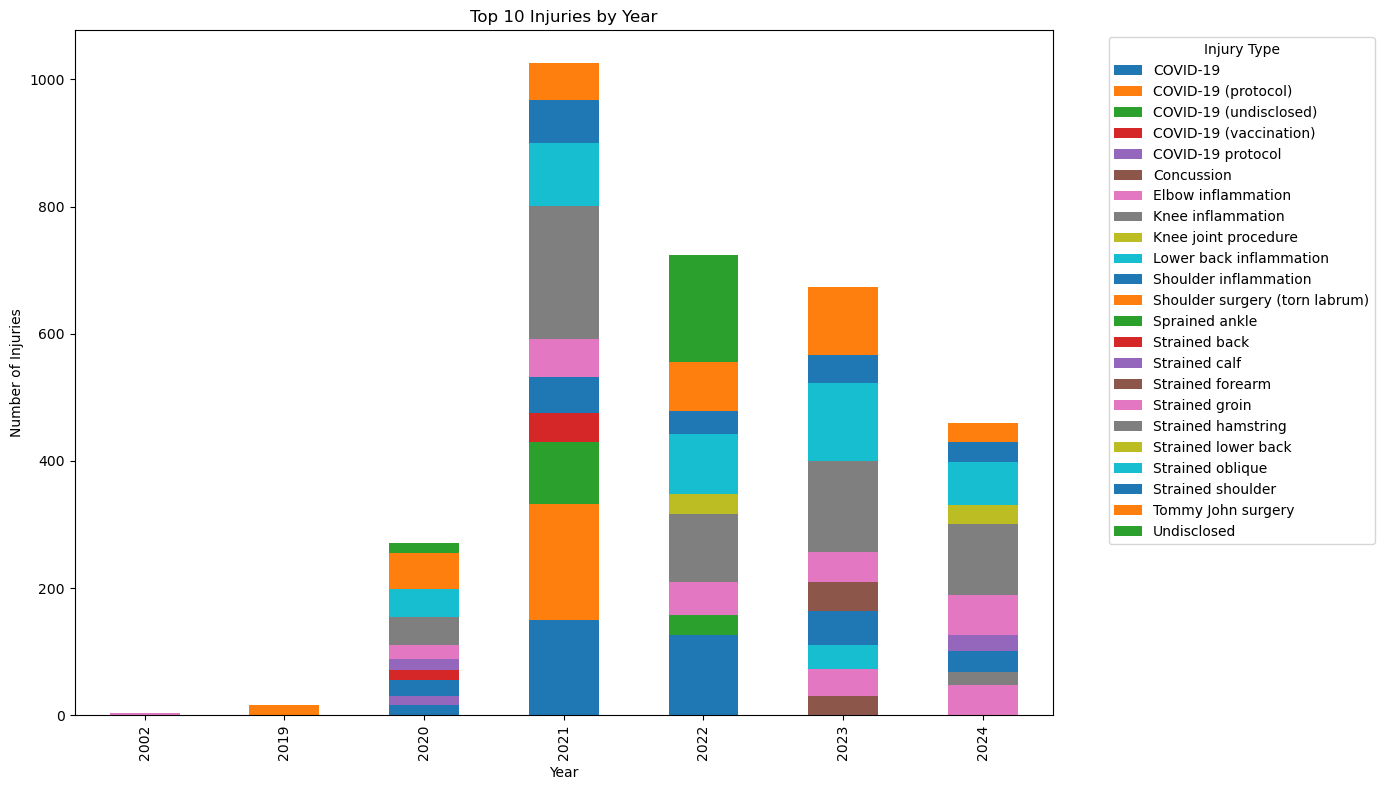

In [15]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df1_cleaned = df1.dropna(subset=['Injury / Surgery'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery'])
combined_df = pd.concat([df1_cleaned, df2_cleaned])
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')
combined_df = combined_df.dropna(subset=['Injury / Surgery Date'])
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year
injuries_by_year = combined_df.groupby(['Year', 'Injury / Surgery']).size().reset_index(name='Count')

# Get the top 10 injuries for each year
top_injuries_by_year = (injuries_by_year
                        .sort_values(['Year', 'Count'], ascending=[True, False])
                        .groupby('Year')
                        .head(10))

# Plotting the results
plt.figure(figsize=(14, 8))

# pivot table for better plotting
pivot_table = top_injuries_by_year.pivot_table(index='Year', columns='Injury / Surgery', values='Count', fill_value=0)

# Plot each injury type
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Top 10 Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Injuries based on Top 10 player status

<Figure size 1400x800 with 0 Axes>

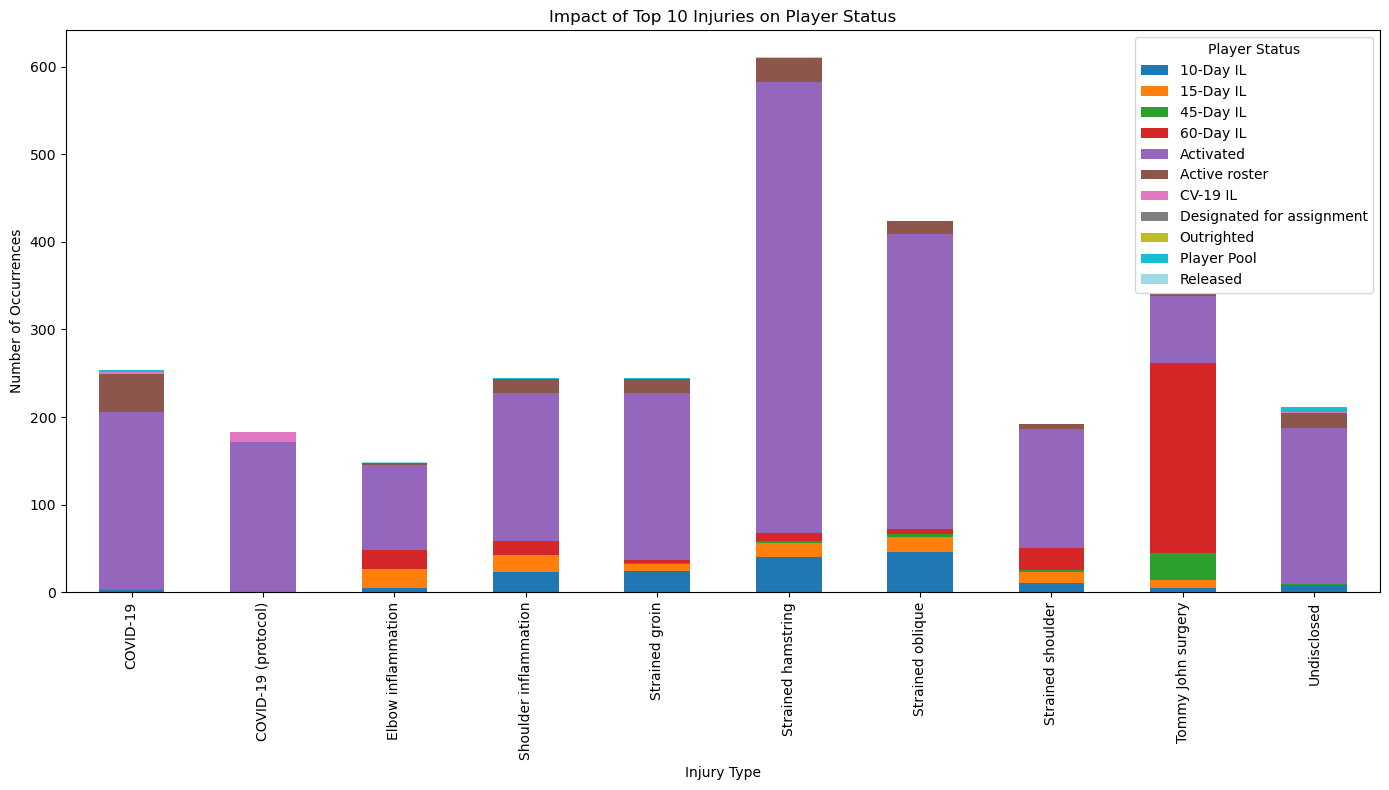

In [16]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data if necessary remove NaN values
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Status'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Status'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Get the top 10 most common injuries
top_injuries = combined_df['Injury / Surgery'].value_counts().head(10).index

# Filter the combined DataFrame to include only the top 10 injuries
top_injuries_df = combined_df[combined_df['Injury / Surgery'].isin(top_injuries)]

# Analyze the relationship between the top 10 injury types and player statuses
# Count the number of occurrences of each injury type and status combination
injury_status_counts = top_injuries_df.groupby(['Injury / Surgery', 'Status']).size().unstack(fill_value=0)

# Plotting the results
plt.figure(figsize=(14, 8))

# Plot a stacked bar chart to show the count of injuries by status for each of the top 10 injury types
injury_status_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Impact of Top 10 Injuries on Player Status')
plt.xlabel('Injury Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Player Status')

plt.tight_layout()
plt.show()

### Injuries based on location


Total injuries by position:
Pos
1B         269.0
1B/3B       22.0
1B/OF       49.0
2B         216.0
2B/OF        4.0
3B         263.0
3B/1B       18.0
3B/OF       10.0
C          297.0
C/1B         2.0
C/OF         2.0
DH          60.0
INF        301.0
INF/OF     259.0
OF        1193.0
OF/1B       78.0
OF/INF      49.0
Of           5.0
RP        1392.0
RP/SP       13.0
SP        2471.0
SP/RP       41.0
SS         336.0
UTL          1.0
dtype: float64


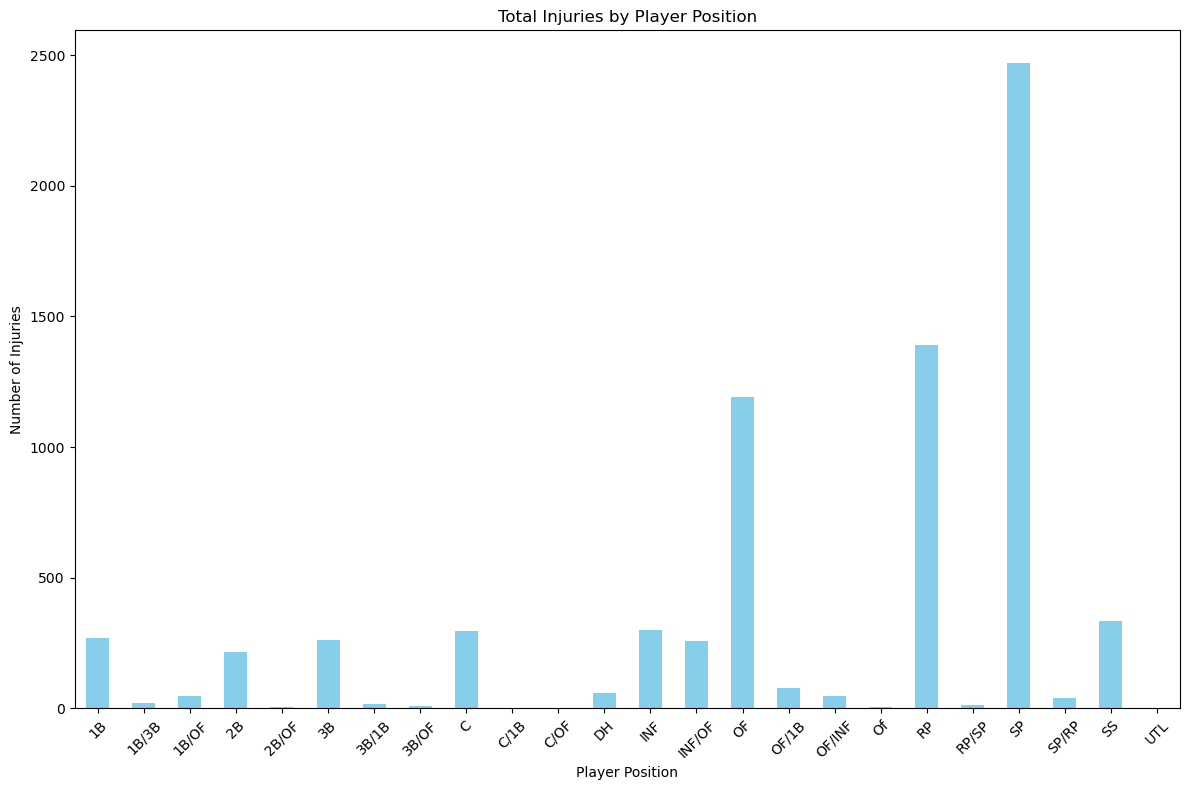

In [17]:
# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Debug: Check total injuries by position
print("\nTotal injuries by position:")
print(total_injuries_by_position)

# Plotting the results
plt.figure(figsize=(12, 8))
total_injuries_by_position.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Inspect the first few rows of the date column
print("First few rows of 'Injury / Surgery Date' in df1:")
print(df1['Injury / Surgery Date'].head())
print("\nFirst few rows of 'Injury / Surgery Date' in df2:")
print(df2['Injury / Surgery Date'].head())

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery Date'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery Date'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Inspect the unique date formats
print("\nUnique values in 'Injury / Surgery Date':")
print(combined_df['Injury / Surgery Date'].unique())

# Convert to datetime, using errors='coerce' to handle invalid dates
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Check if there are still invalid dates
invalid_dates = combined_df[combined_df['Injury / Surgery Date'].isna()]
print("\nRows with invalid dates:")
print(invalid_dates)

# Remove rows with invalid dates
combined_df = combined_df.dropna(subset=['Injury / Surgery Date'])

First few rows of 'Injury / Surgery Date' in df1:
0    09/02/22
1    04/10/21
2         NaN
3         NaN
4    07/25/23
Name: Injury / Surgery Date, dtype: object

First few rows of 'Injury / Surgery Date' in df2:
0    2022-08-23
1    2022-09-28
2    2023-03-14
3    2023-03-22
4    2023-04-12
Name: Injury / Surgery Date, dtype: object

Unique values in 'Injury / Surgery Date':
['09/02/22' '04/10/21' '07/25/23' ... '2020-09-25' '2020-09-29'
 '2020-10-06']

Rows with invalid dates:
      player_id  year_x  player_age    hit  single  double  triple  home_run  \
12     446334.0  2020.0        34.0   49.0    31.0    10.0     1.0       7.0   
18     453568.0  2020.0        33.0   67.0    48.0    12.0     1.0       6.0   
61     518692.0  2020.0        30.0   73.0    36.0    23.0     1.0      13.0   
62     518735.0  2020.0        31.0   37.0    22.0     7.0     0.0       8.0   
69     518934.0  2020.0        31.0   71.0    49.0    10.0     2.0      10.0   
...         ...     ...         ...

C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\2814740988.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


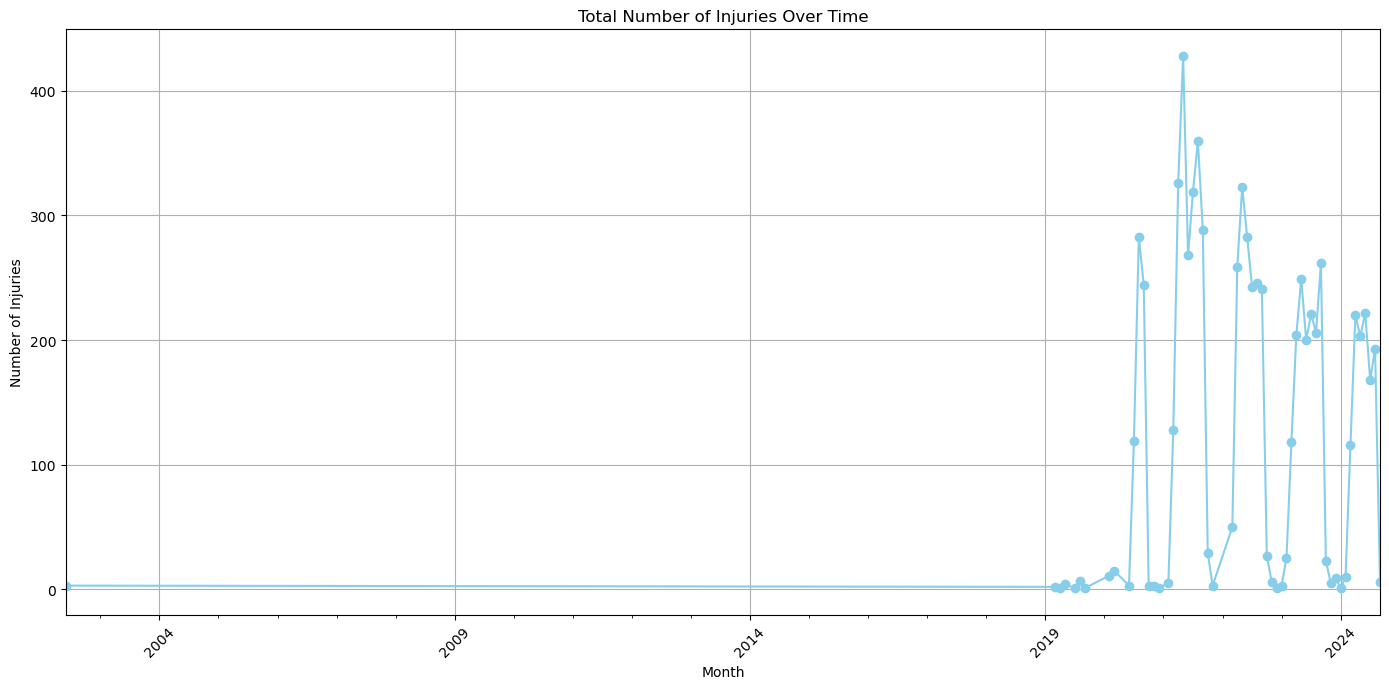

In [19]:
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year
combined_df['Month'] = combined_df['Injury / Surgery Date'].dt.to_period('M')

# Count the number of injuries per month
injuries_per_month = combined_df.groupby('Month').size()

# Plotting the results
plt.figure(figsize=(14, 7))
injuries_per_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Number of Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-18-bd7da33a14d2>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


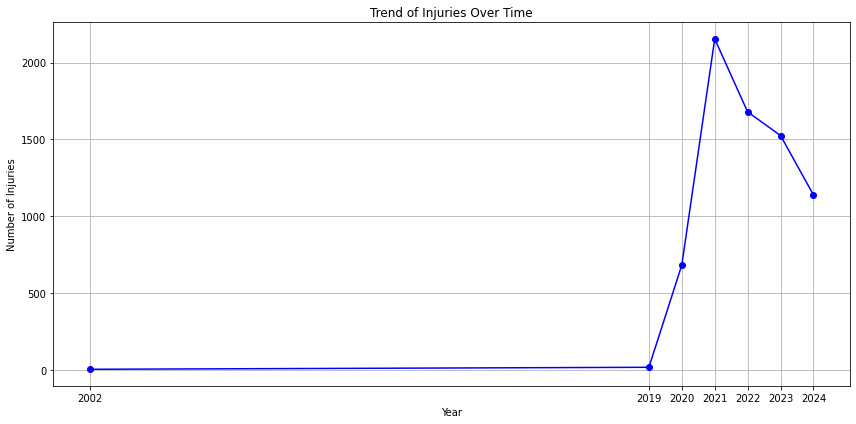

In [18]:
df1 = pd.read_csv("../Data/injury_report_combined_years_v4.csv")
df2 = pd.read_csv("../Data/CombinedBPI.csv")

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from the date
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Count the number of injuries per year
injuries_per_year = combined_df['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(injuries_per_year.index, injuries_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Injuries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.xticks(injuries_per_year.index)  # Ensure all years are shown on the x-axis
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\4111343998.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


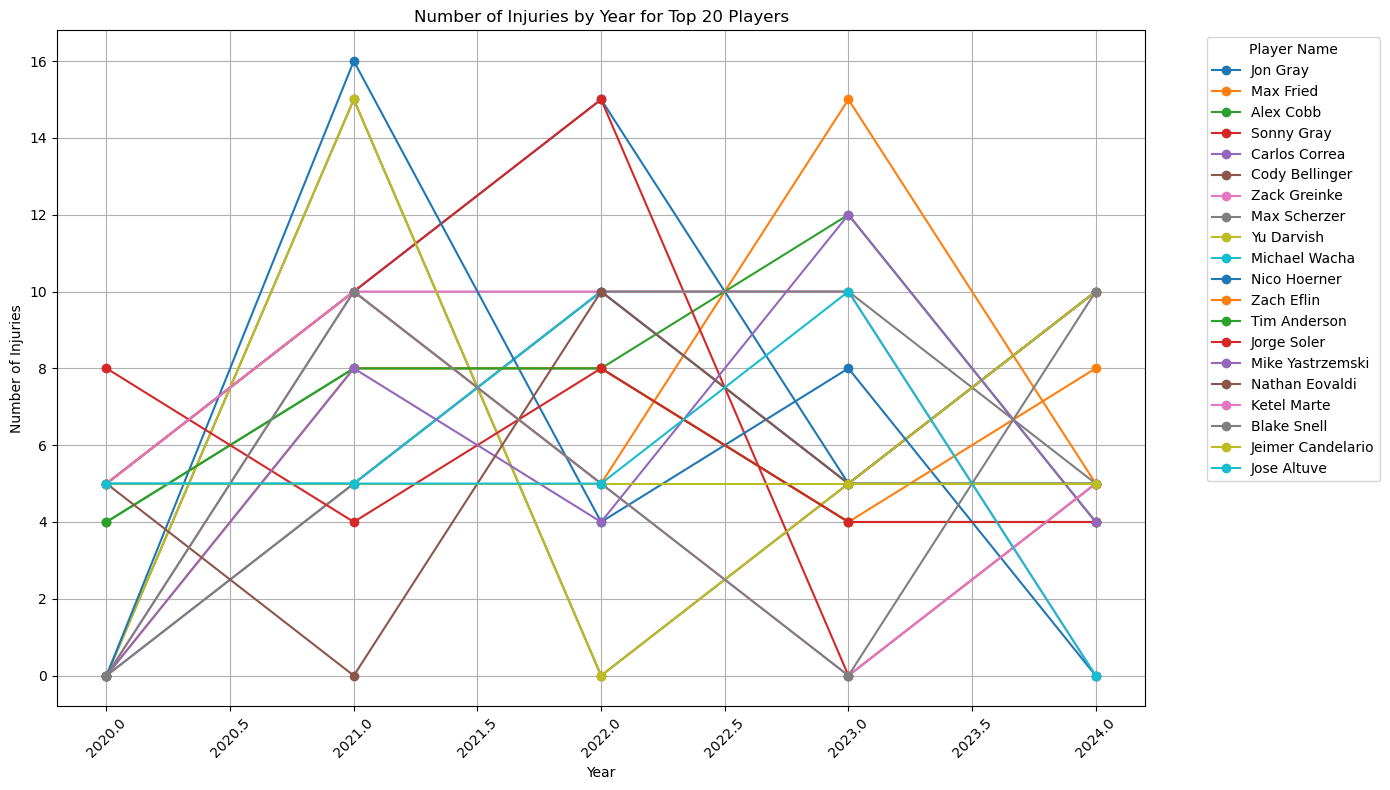

In [40]:
### not using too messy
# Load both CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from 'Injury / Surgery Date'
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Aggregate the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 20 players with the most injuries
top_20_players = injuries_per_player.head(20).index

# Filter data to include only top 20 players
top_20_injuries = combined_df[combined_df['Name'].isin(top_20_players)]

# Count the number of injuries per year for top 20 players
injuries_by_year_player = top_20_injuries.groupby(['Name', 'Year']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(14, 8))

for player in top_20_players:
    plt.plot(injuries_by_year_player.columns, injuries_by_year_player.loc[player], marker='o', label=player)

plt.title('Number of Injuries by Year for Top 20 Players')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3718484466.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


<Figure size 1400x1000 with 0 Axes>

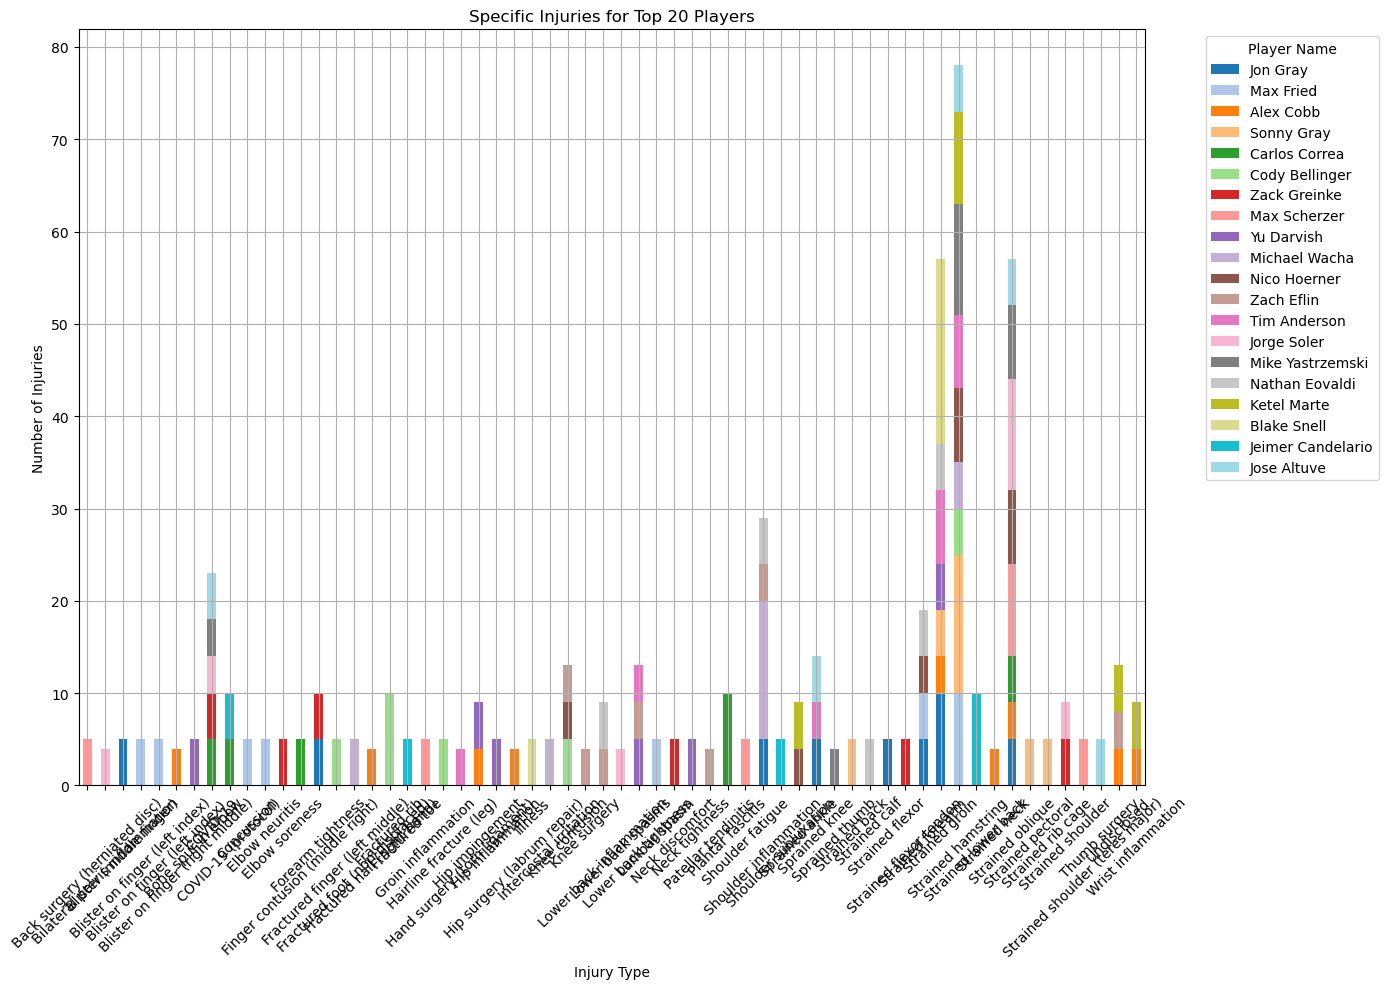

In [41]:
### not using too messy
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from 'Injury / Surgery Date'
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Aggregate the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 20 players with the most injuries
top_20_players = injuries_per_player.head(20).index

# Filter data to include only top 20 players
top_20_injuries = combined_df[combined_df['Name'].isin(top_20_players)]

# Count the number of injuries by type for top 20 players
injuries_by_type = top_20_injuries.groupby(['Name', 'Injury / Surgery']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(14, 10))

# Create a stacked bar chart
injuries_by_type.loc[top_20_players].T.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10))

plt.title('Specific Injuries for Top 20 Players')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\1355520822.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


<Figure size 1400x1000 with 0 Axes>

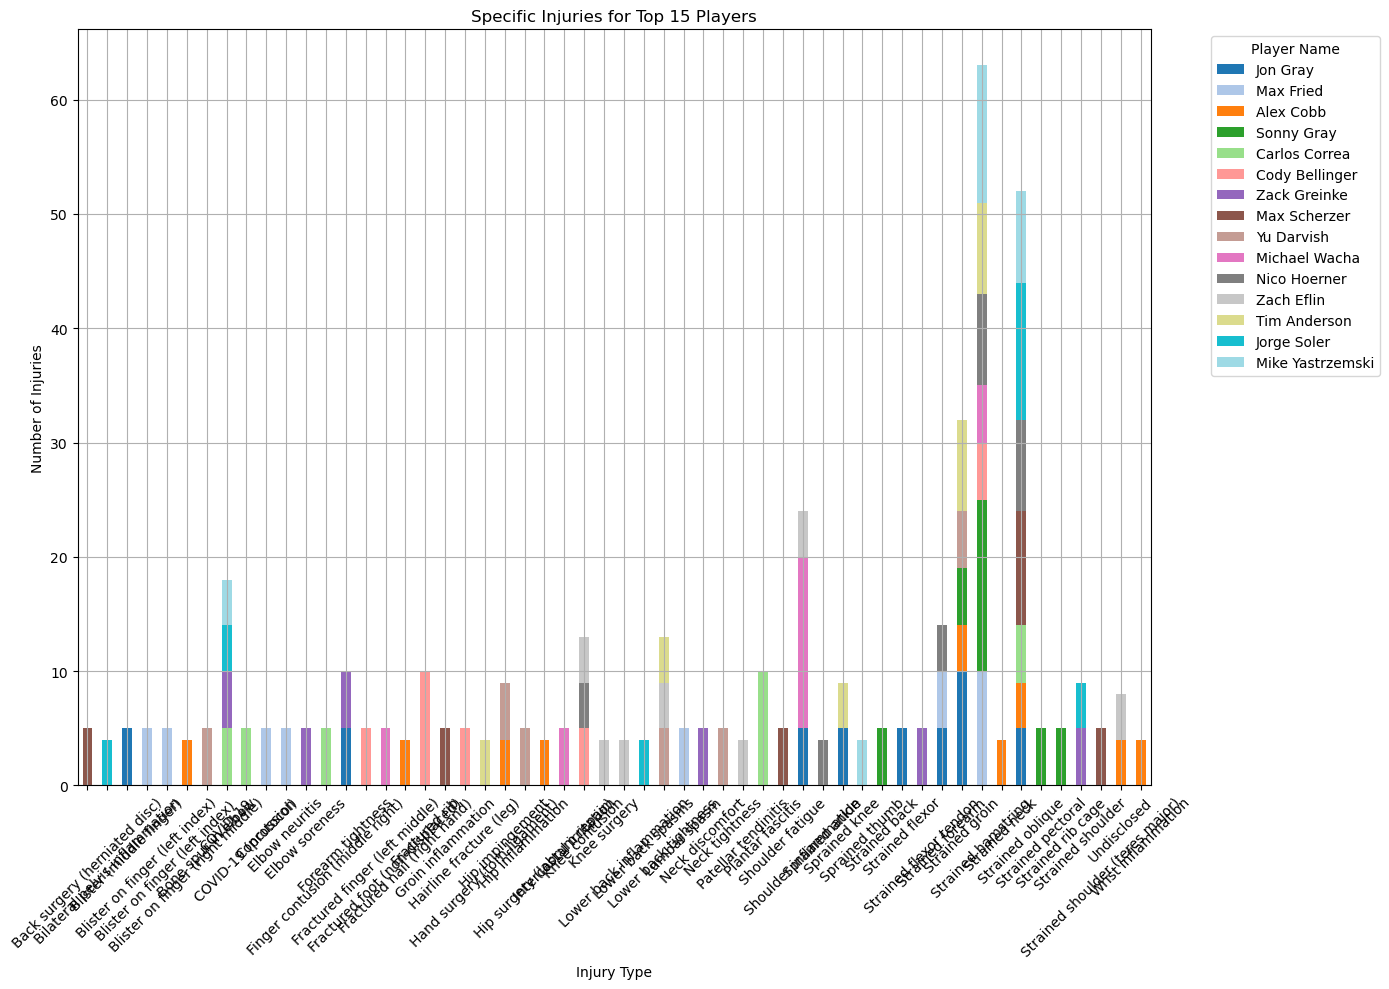

In [42]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from 'Injury / Surgery Date'
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Aggregate the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 15 players with the most injuries
top_15_players = injuries_per_player.head(15).index

# Filter data to include only top 15 players
top_15_injuries = combined_df[combined_df['Name'].isin(top_15_players)]

# Count the number of injuries by type for top 15 players
injuries_by_type = top_15_injuries.groupby(['Name', 'Injury / Surgery']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(14, 10))

# Create a stacked bar chart
injuries_by_type.loc[top_15_players].T.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 10))

plt.title('Specific Injuries for Top 15 Players')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3563938541.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')


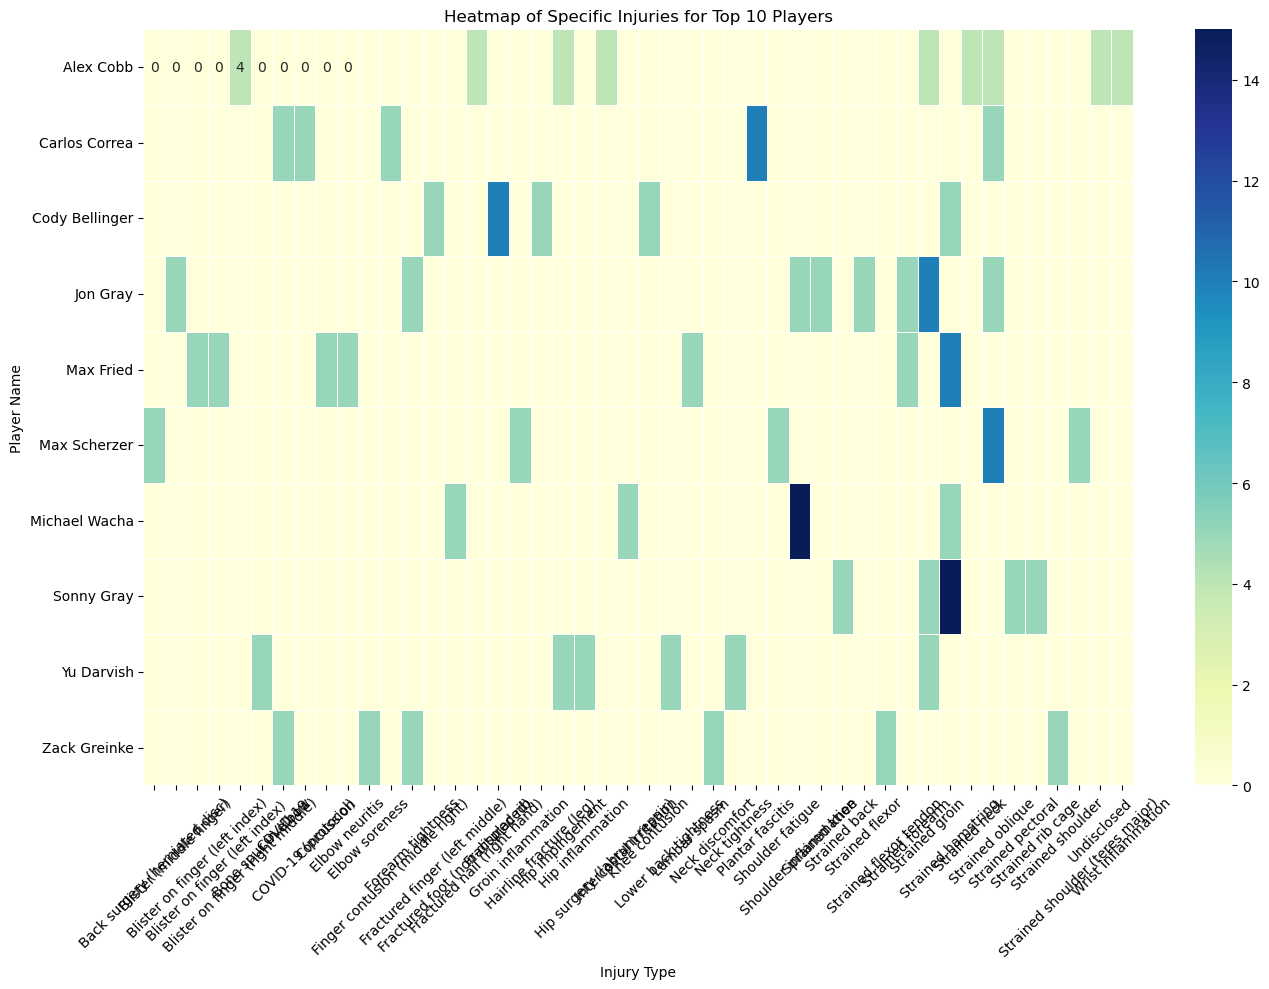

In [43]:
import seaborn as sns

# Load both CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from 'Injury / Surgery Date'
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Aggregate the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 10 players with the most injuries
top_10_players = injuries_per_player.head(10).index

# Filter data to include only top 10 players
top_10_injuries = combined_df[combined_df['Name'].isin(top_10_players)]

# Count the number of injuries by type for top 10 players
injuries_by_type = top_10_injuries.groupby(['Name', 'Injury / Surgery']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(14, 10))

# Create a heatmap
sns.heatmap(injuries_by_type, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

plt.title('Heatmap of Specific Injuries for Top 10 Players')
plt.xlabel('Injury Type')
plt.ylabel('Player Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\577728592.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')
C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\577728592.py:49: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\577728592.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\alexi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


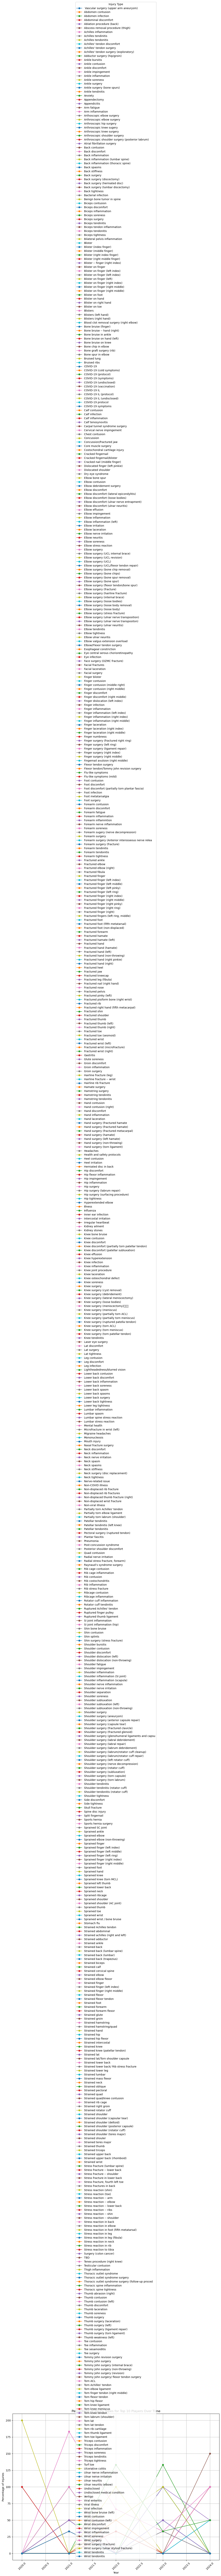

In [45]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convert 'Injury / Surgery Date' to datetime
combined_df['Injury / Surgery Date'] = pd.to_datetime(combined_df['Injury / Surgery Date'], errors='coerce')

# Extract year from 'Injury / Surgery Date'
combined_df['Year'] = combined_df['Injury / Surgery Date'].dt.year

# Drop rows with missing or invalid years
combined_df = combined_df.dropna(subset=['Year'])

# Aggregate the number of injuries per player and year
injuries_by_player_year = combined_df.groupby(['Name', 'Year', 'Injury / Surgery']).size().unstack(fill_value=0)

# Calculate the percentage of each injury type per player per year
percentage_injuries = injuries_by_player_year.div(injuries_by_player_year.sum(axis=1), axis=0) * 100

# Filter to include only the top 10 players with the most injuries
top_10_players = combined_df['Name'].value_counts().head(10).index
percentage_top_10 = percentage_injuries.loc[top_10_players]

# Plotting the data
plt.figure(figsize=(14, 10))

# Plot each injury type for the top 10 players over time
for injury_type in percentage_top_10.columns:
    plt.plot(percentage_top_10.groupby('Year').sum().index,
             percentage_top_10.groupby('Year').sum()[injury_type],
             label=injury_type,
             marker='o')

plt.title('Percentage of Injury Types for Top 10 Players Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Injuries')
plt.legend(title='Injury Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_10508\3507528140.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x1000 with 0 Axes>

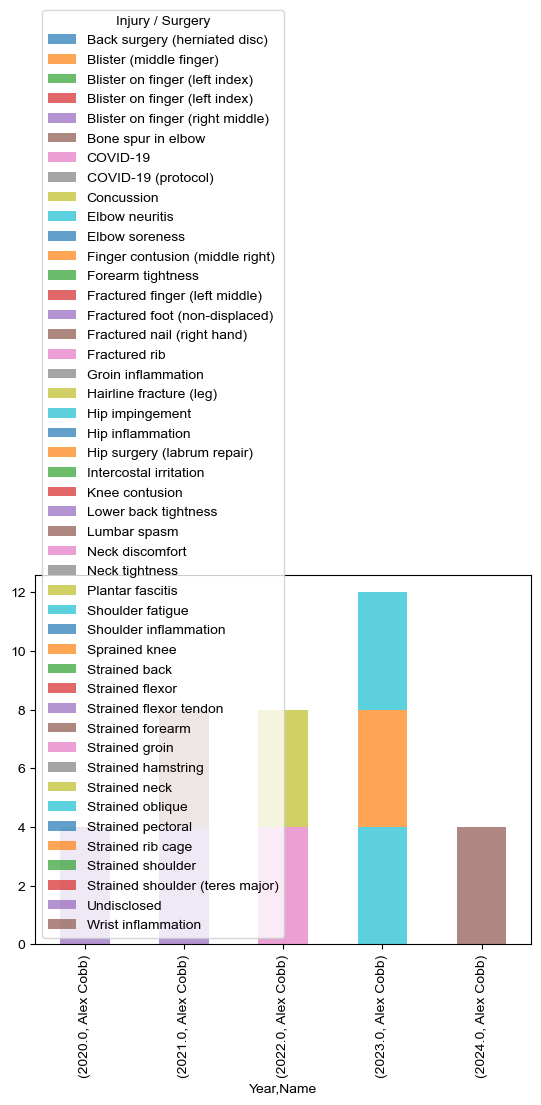

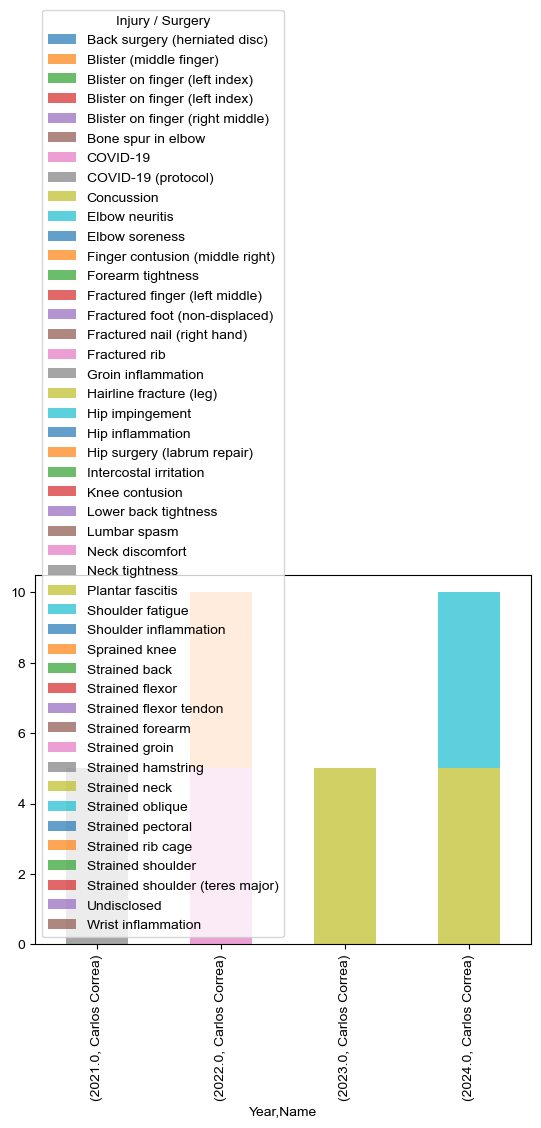

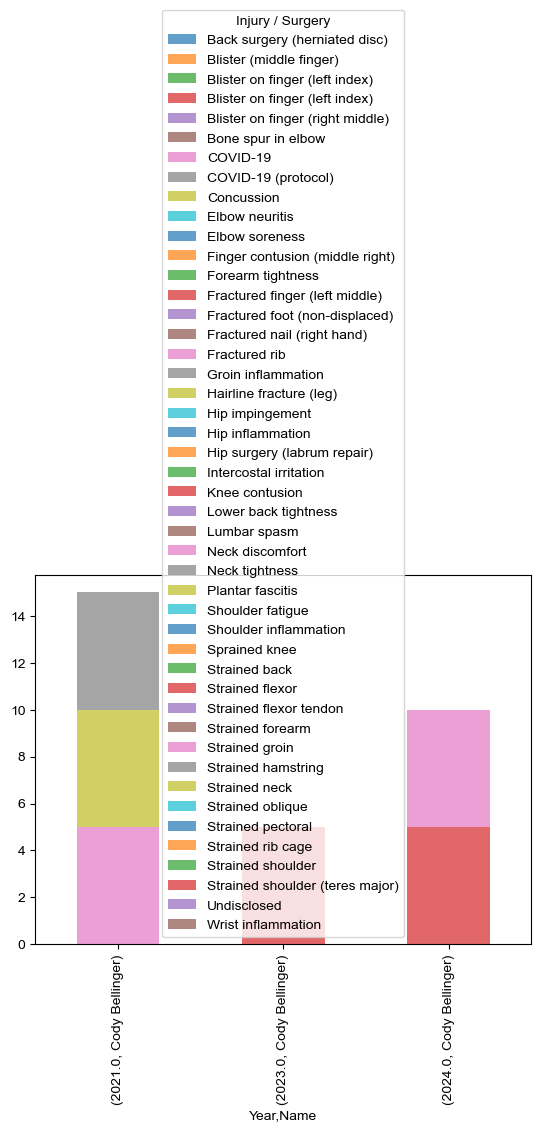

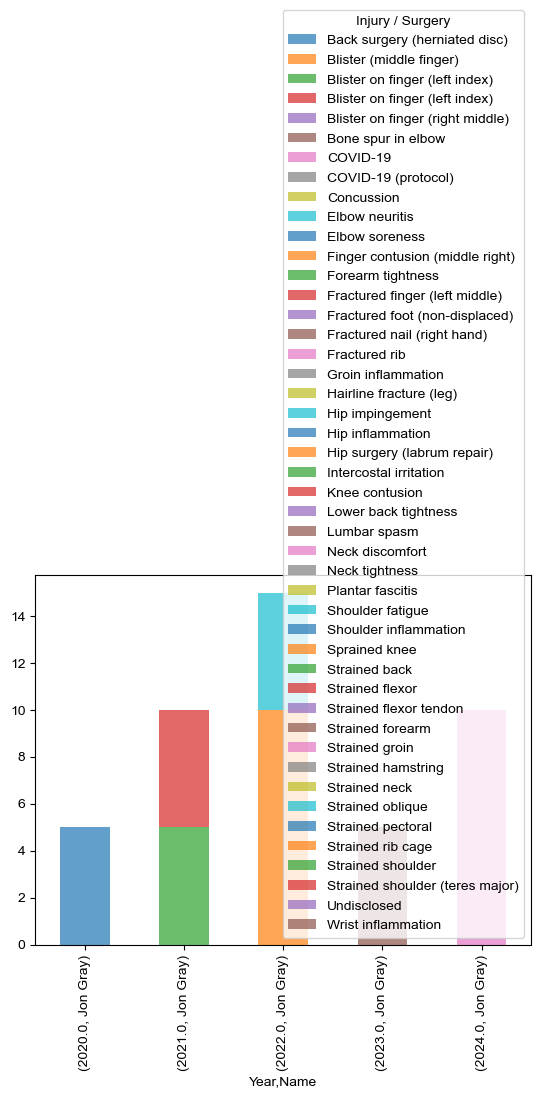

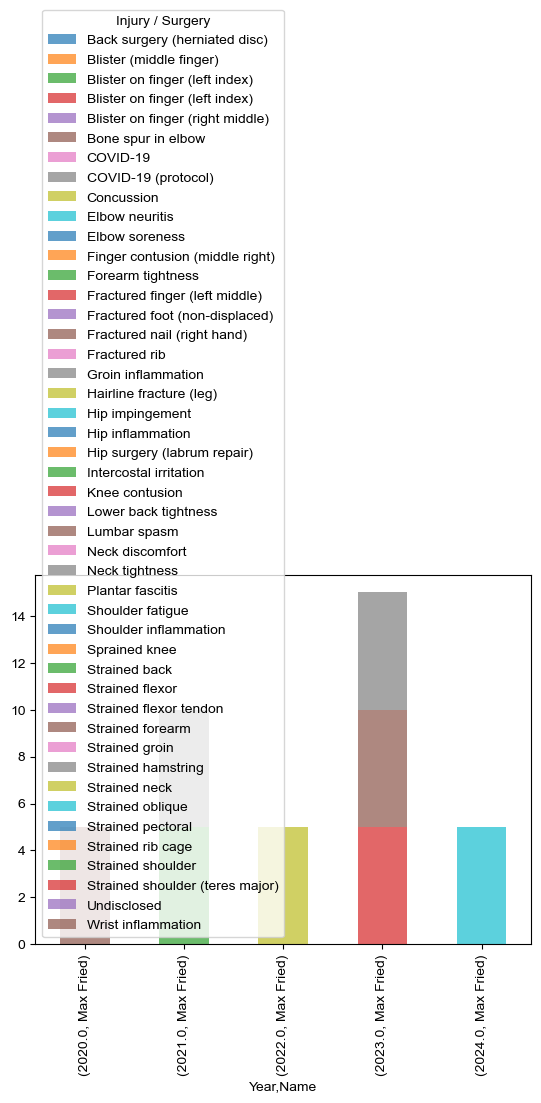

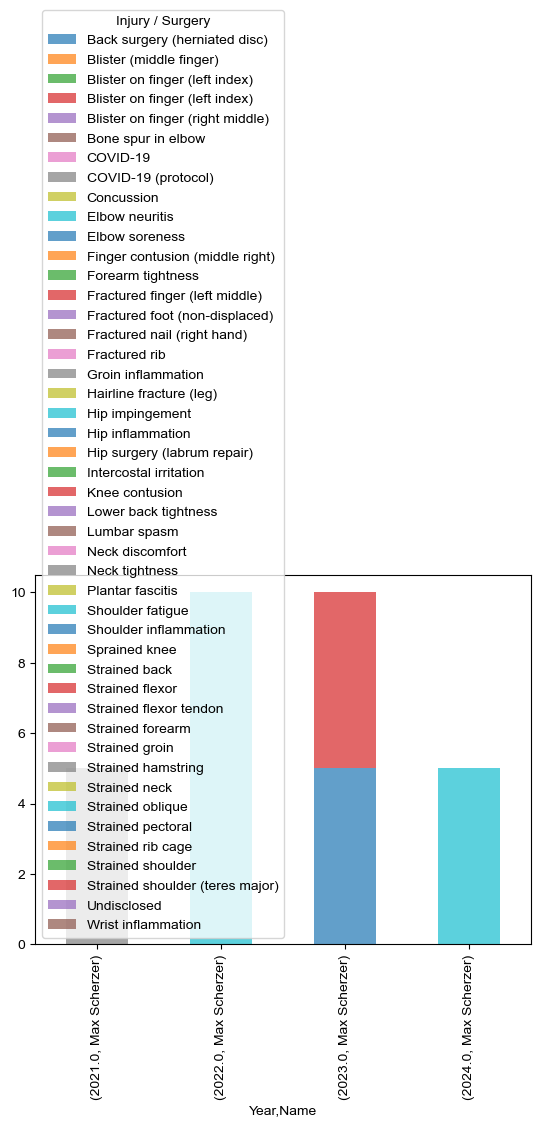

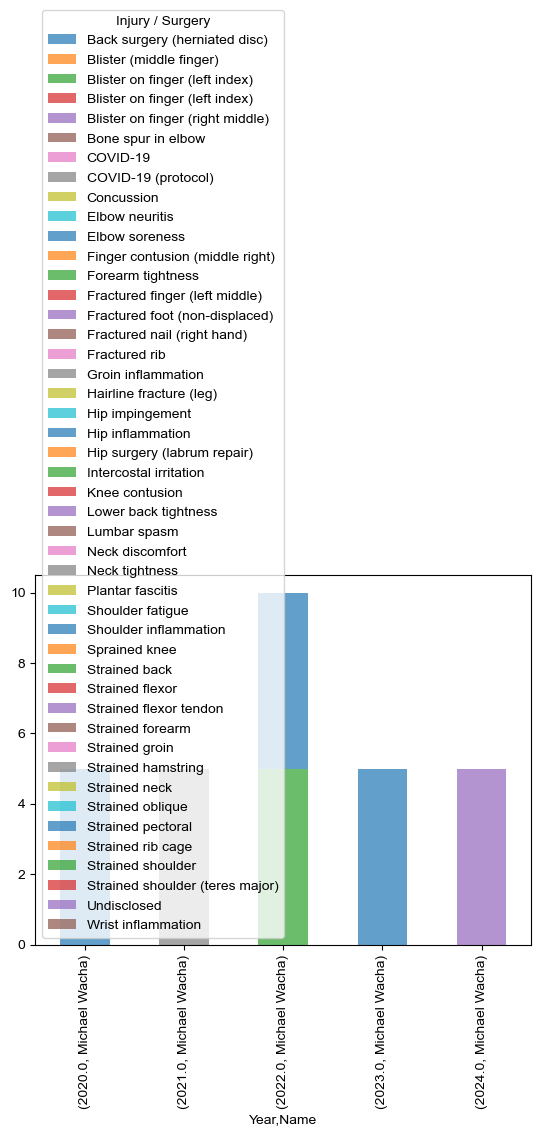

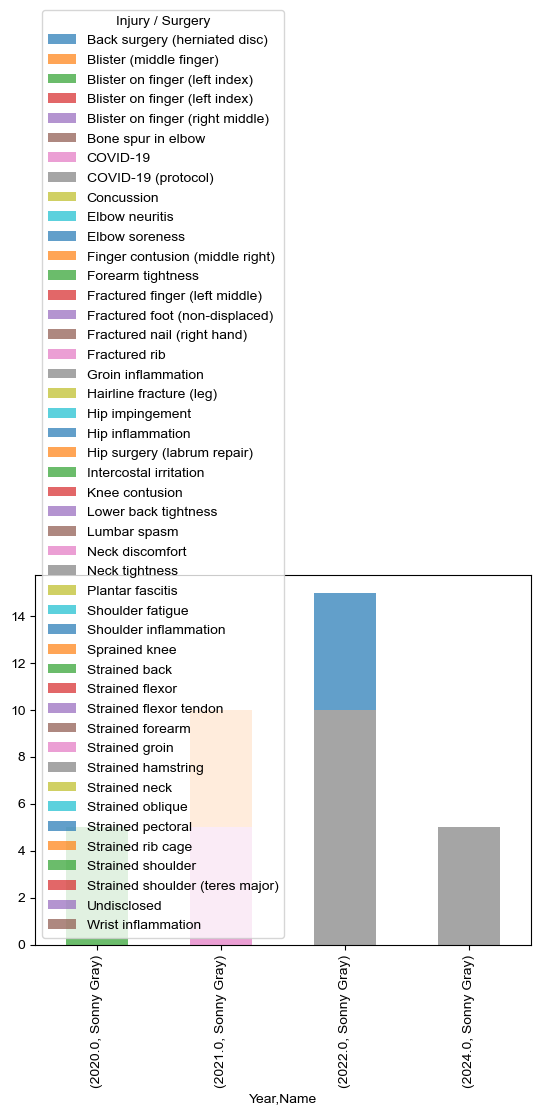

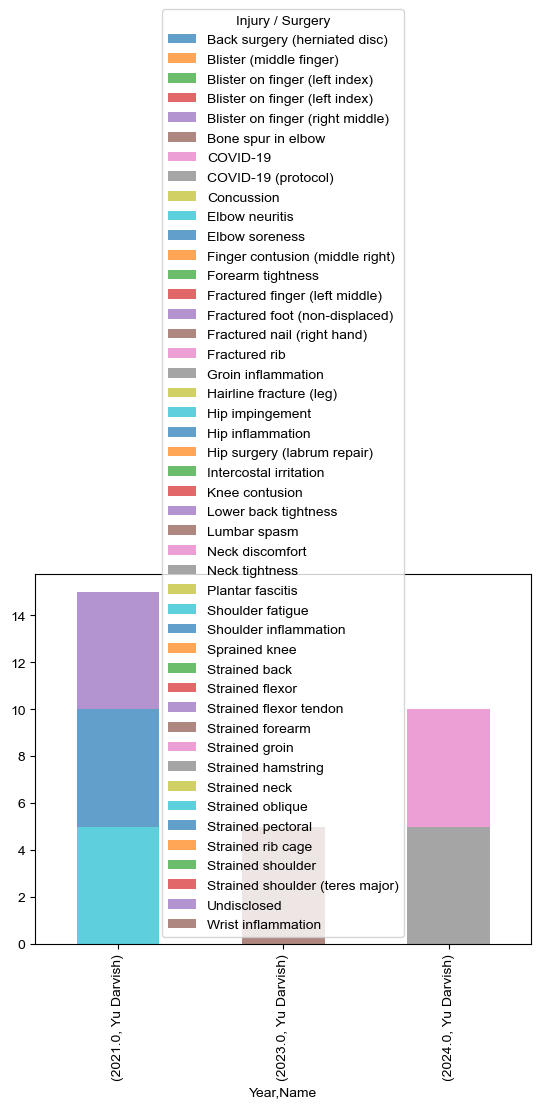

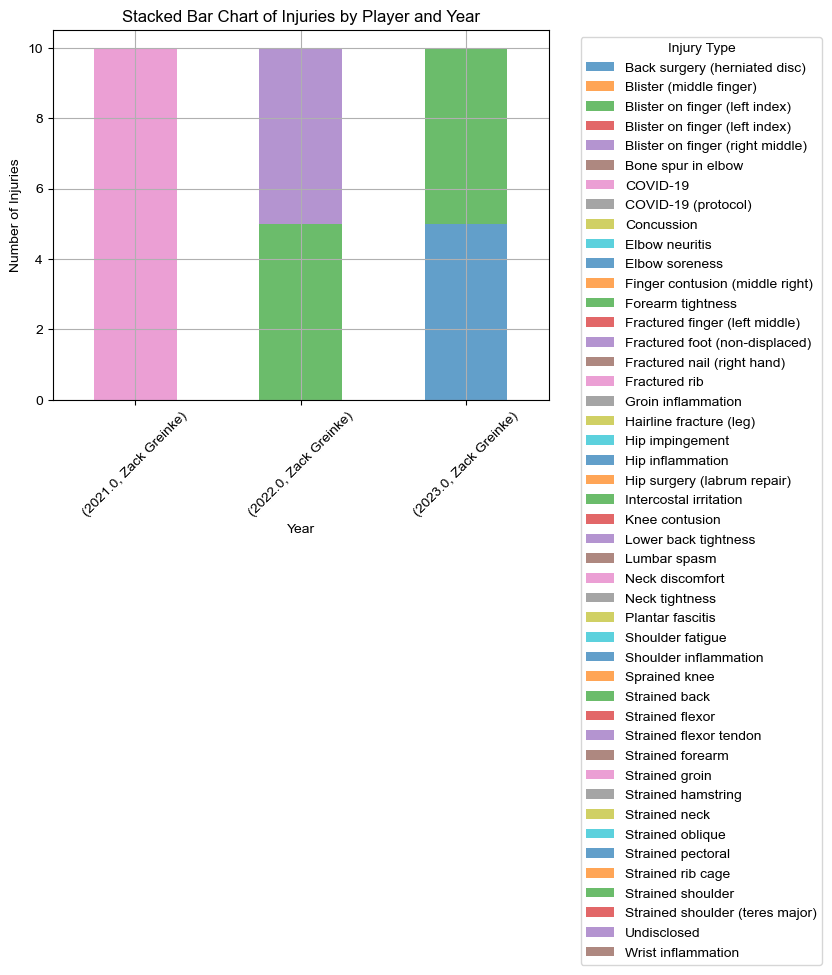

In [48]:
# Plotting a stacked bar chart
top_10_player_injuries = combined_df[combined_df['Name'].isin(top_10_players)]
injuries_by_year_player = top_10_player_injuries.groupby(['Year', 'Name', 'Injury / Surgery']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
injuries_by_year_player.groupby(level=1).plot(kind='bar', stacked=True, alpha=0.7)
plt.title('Stacked Bar Chart of Injuries by Player and Year')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Players with Most Injuries:
Name
Jon Gray          45
Max Fried         40
Sonny Gray        39
Alex Cobb         36
Michael Wacha     30
Cody Bellinger    30
Carlos Correa     30
Zack Greinke      30
Max Scherzer      30
Yu Darvish        30
Name: count, dtype: int64


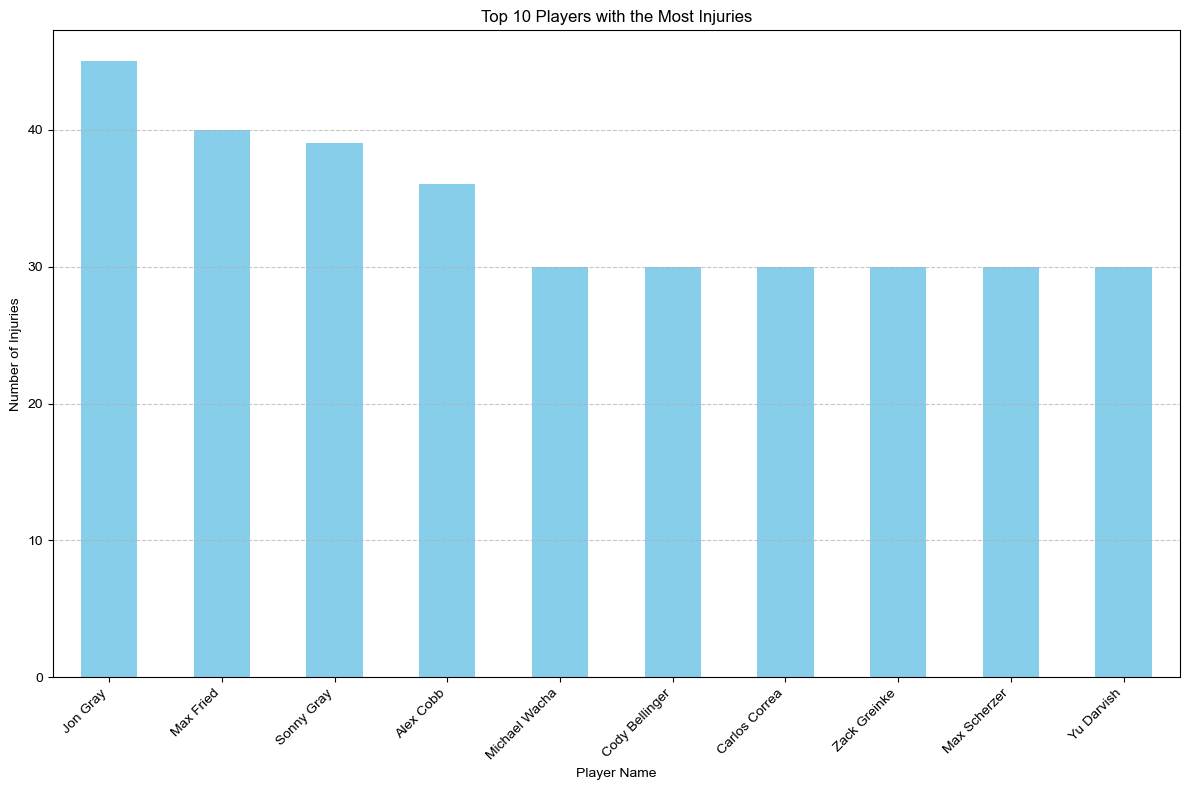

In [49]:
# Load both CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Count the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 10 players with the most injuries
top_10_players = injuries_per_player.head(10)

# Display the top 10 players as a table
print("Top 10 Players with Most Injuries:")
print(top_10_players)

# Plotting the data
plt.figure(figsize=(12, 8))
top_10_players.plot(kind='bar', color='skyblue')
plt.title('Top 10 Players with the Most Injuries')
plt.xlabel('Player Name')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


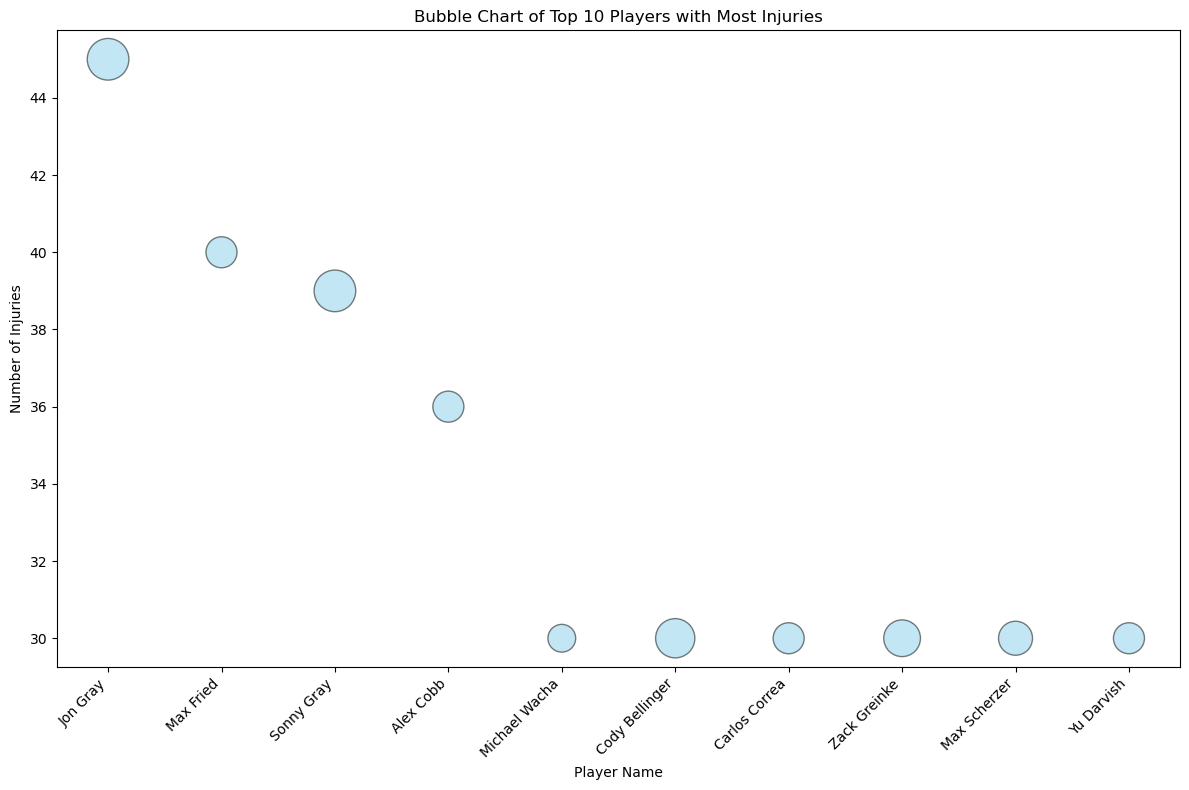

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load both CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Count the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 10 players with the most injuries
top_10_players = injuries_per_player.head(10)

# Generate additional data for the bubble chart (e.g., arbitrary values)
additional_data = np.random.randint(1, 10, size=len(top_10_players))

# Plotting the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(top_10_players.index, top_10_players.values, s=additional_data*100, alpha=0.5, color='skyblue', edgecolor='black')

# Adding labels and titles
plt.title('Bubble Chart of Top 10 Players with Most Injuries')
plt.xlabel('Player Name')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Count the number of injuries per player
injuries_per_player = combined_df['Name'].value_counts()

# Get the top 10 players with the most injuries
top_10_players = injuries_per_player.head(10)

# Convert to DataFrame for better presentation
top_10_players_df = top_10_players.reset_index()
top_10_players_df.columns = ['Player Name', 'Number of Injuries']

# Display the table
print("Top 10 Players with Most Injuries:")
top_10_players_df.head(10)

Top 10 Players with Most Injuries:


Player Name  Number of Injuries
0        Jon Gray                  45
1       Max Fried                  40
2      Sonny Gray                  39
3       Alex Cobb                  36
4   Michael Wacha                  30
5  Cody Bellinger                  30
6   Carlos Correa                  30
7    Zack Greinke                  30
8    Max Scherzer                  30
9      Yu Darvish                  30

In [58]:
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine both DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Count the number of injuries per player position
injuries_per_position = combined_df['Pos'].value_counts()

# Convert to DataFrame for better presentation
injuries_per_position_df = injuries_per_position.reset_index()
injuries_per_position_df.columns = ['Position', 'Number of Injuries']

# Display the table
print("Number of Injuries by Player Position:")
injuries_per_position_df.head(23)

Number of Injuries by Player Position:


Position  Number of Injuries
0        SP                2471
1        RP                1392
2        OF                1193
3        SS                 336
4       INF                 301
5         C                 297
6        1B                 269
7        3B                 263
8    INF/OF                 259
9        2B                 216
10    OF/1B                  78
11       DH                  60
12    1B/OF                  49
13   OF/INF                  49
14    SP/RP                  41
15    1B/3B                  22
16    3B/1B                  18
17    RP/SP                  13
18    3B/OF                  10
19       Of                   5
20    2B/OF                   4
21     C/OF                   2
22     C/1B                   2

### Pitching

In [59]:
df = pd.read_csv("Pitchers2.csv")
df

last_name, first_name  player_id  year  hit  single  double  triple  \
0           Colon, Bartolo     112526  2015  217     149      41       2   
1            Burnett, A.J.     150359  2015  174     134      24       5   
2              Hudson, Tim     218596  2015  134     103      16       2   
3            Buehrle, Mark     279824  2015  214     140      46       6   
4             Sabathia, CC     282332  2015  188     134      22       4   
...                    ...        ...   ...  ...     ...     ...     ...   
1108          Pepiot, Ryan     686752  2024   83      52      14       2   
1109         Spence, Mitch     687765  2024  129      79      31       3   
1110        Harrison, Kyle     690986  2024  118      76      24       1   
1111       Pfaadt, Brandon     694297  2024  157     107      25       6   
1112          Stone, Gavin     694813  2024  133      88      25       2   

      home_run  strikeout  walk  k_percent  bb_percent  batting_avg  
0           25        136    24       16.7         2.9        0.281  
1           11        143    49       20.5         7.0        0.275  
2           13         64    37       12.2         7.0        0.282  
3           22         91    33       11.0         4.0        0.279  
4           28        137    50       18.9         6.9        0.285  
...        ...        ...   ...        ...         ...          ...  
1108        15        114    38       25.8         8.6        0.210  
1109        16        105    41       19.6         7.7        0.264  
1110        17        115    41       22.3         7.9        0.256  
1111        19        155    34       23.3         5.1        0.253  
1112        18        116    37       20.0         6.4        0.248  

[1113 rows x 13 columns]

<Figure size 1400x800 with 0 Axes>

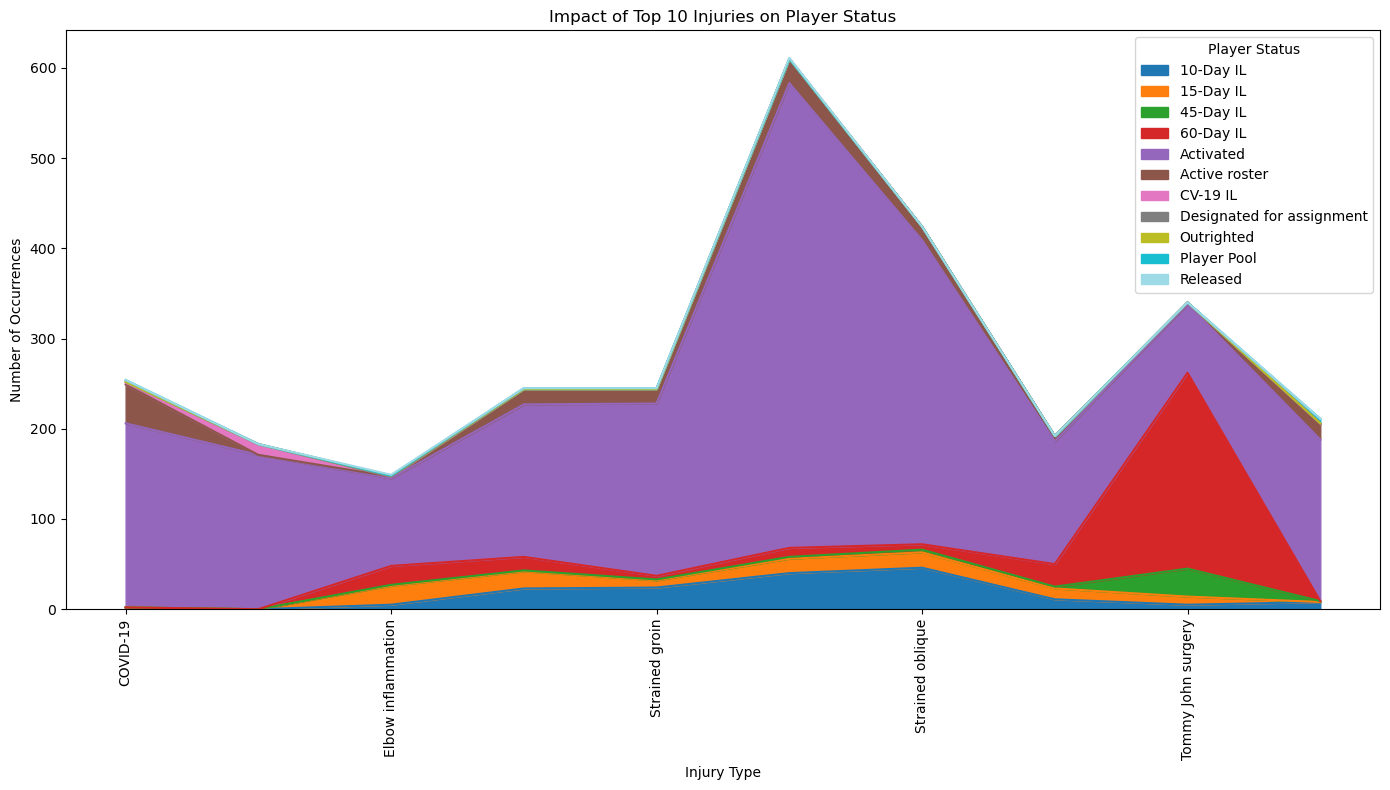

In [1]:
### Area Plot
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data if necessary remove NaN values
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Status'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Status'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Get the top 10 most common injuries
top_injuries = combined_df['Injury / Surgery'].value_counts().head(10).index

# Filter the combined DataFrame to include only the top 10 injuries
top_injuries_df = combined_df[combined_df['Injury / Surgery'].isin(top_injuries)]

# Analyze the relationship between the top 10 injury types and player statuses
# Count the number of occurrences of each injury type and status combination
injury_status_counts = top_injuries_df.groupby(['Injury / Surgery', 'Status']).size().unstack(fill_value=0)

# Plotting the results as an area plot
plt.figure(figsize=(14, 8))

# Plot an area chart to show the count of injuries by status for each of the top 10 injury types
injury_status_counts.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Impact of Top 10 Injuries on Player Status')
plt.xlabel('Injury Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Player Status')

plt.tight_layout()
plt.show()

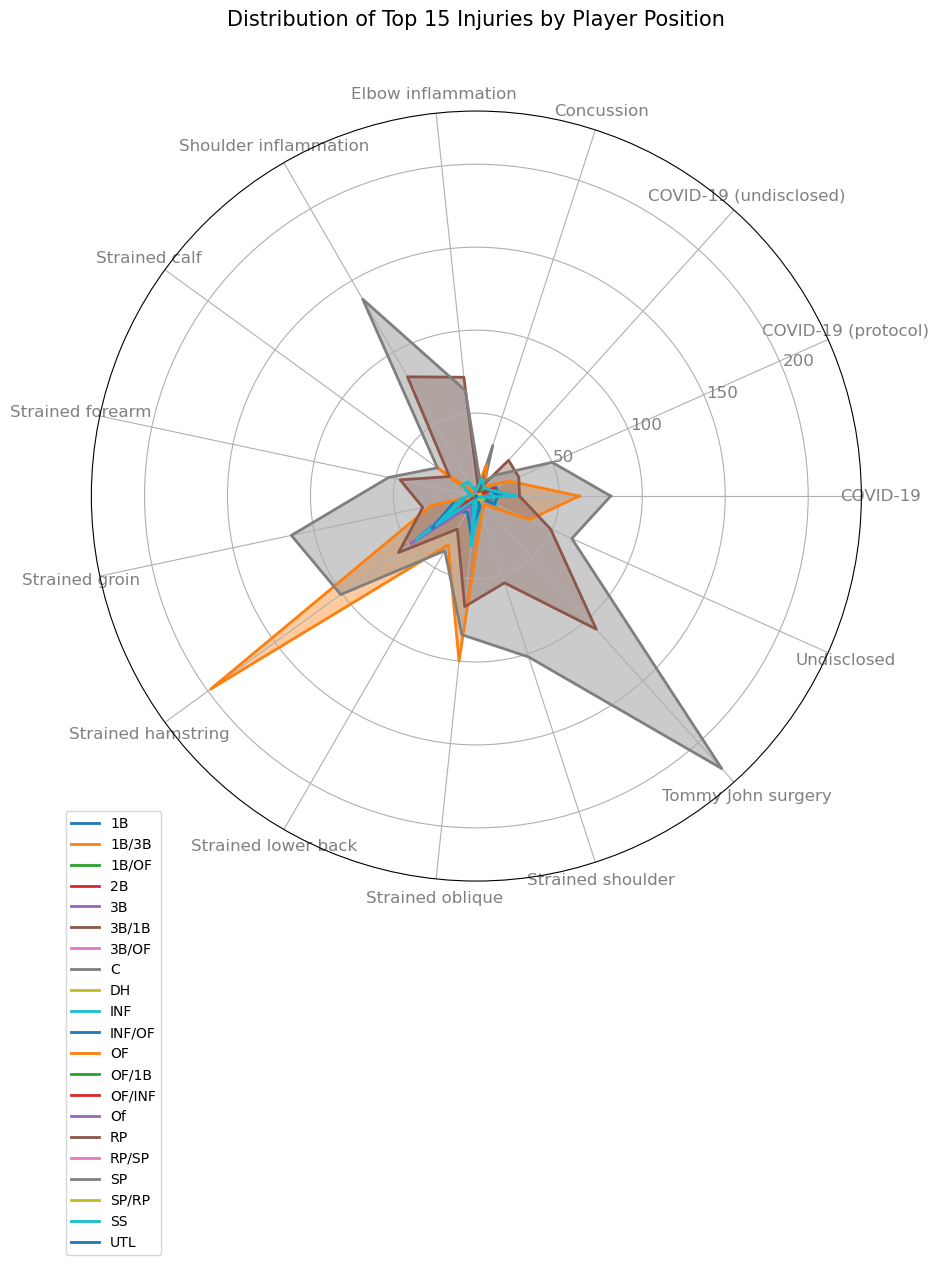

In [4]:
from math import pi

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Get the top 15 most common injuries
top_injuries = combined_df['Injury / Surgery'].value_counts().head(15).index

# Filter the DataFrame to include only the top 15 injuries
top_injuries_df = combined_df[combined_df['Injury / Surgery'].isin(top_injuries)]

# Aggregate data by position and injury type (only for the top 15 injuries)
injuries_by_position = top_injuries_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# List of injury types (categories)
categories = injuries_by_position.columns.tolist()

# Number of injury types
N = len(categories)

# Calculate angle for each axis in the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop for the radar chart

# Initialize the spider chart
plt.figure(figsize=(10, 10))

ax = plt.subplot(111, polar=True)

# Plot data for each position
for position in injuries_by_position.index:
    values = injuries_by_position.loc[position].tolist()
    values += values[:1]  # Repeat the first value to close the loop

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=position)
    ax.fill(angles, values, alpha=0.4)

# Add labels to the chart
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(color="grey", size=12)
plt.title('Distribution of Top 15 Injuries by Player Position', size=15, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the chart
plt.show()

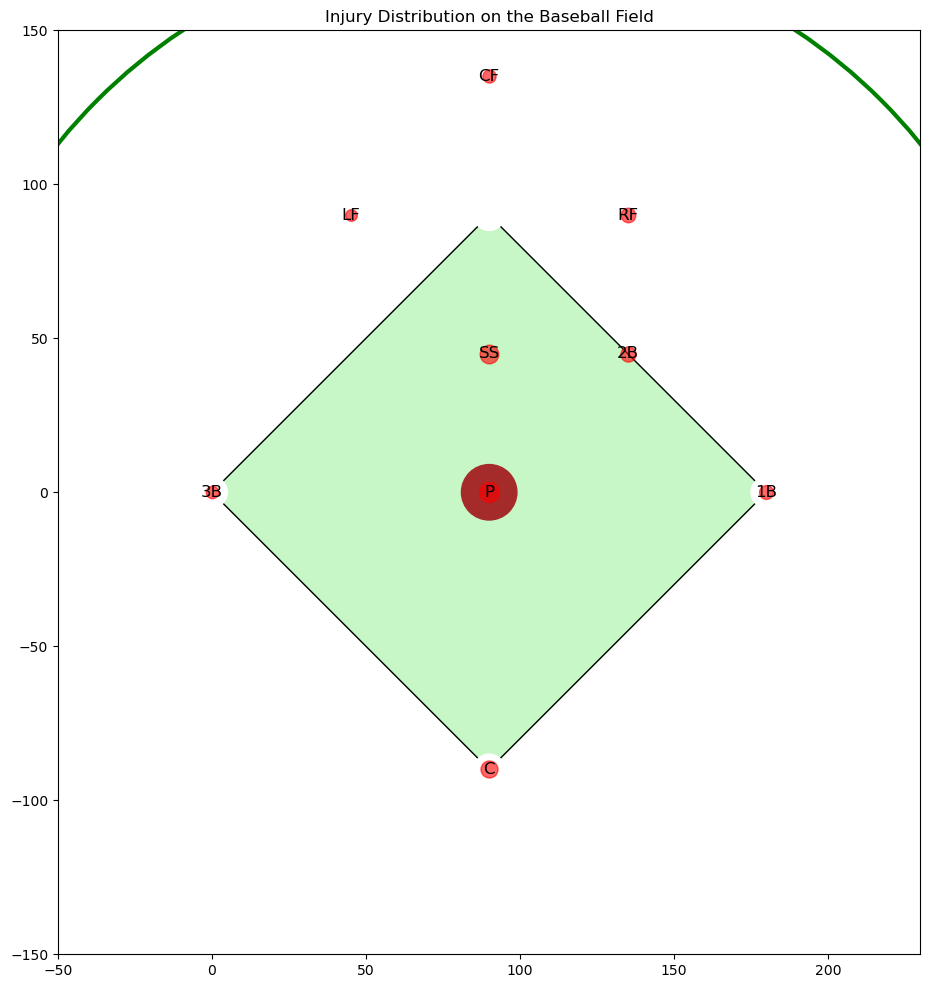

In [6]:
import numpy as np
import matplotlib.patches as patches

# Function to draw a baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Sample position data (replace with actual data)
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Sample injury data by position (replace with actual data)
injury_data = {
    'P': 20,
    'C': 15,
    '1B': 10,
    '2B': 12,
    '3B': 8,
    'SS': 18,
    'LF': 7,
    'CF': 9,
    'RF': 11
}

# Draw the field
fig, ax = draw_baseball_field()

# Plot injury data on the field
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')
    size = injury_data.get(position, 0) * 10  # Scale the size by injury count
    ax.scatter(x, y, s=size, color='red', alpha=0.6)

plt.title('Injury Distribution on the Baseball Field')
plt.show()

In [20]:
import pandas as pd

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Print total injuries by position for debugging
print("\nTotal injuries by position:")
print(total_injuries_by_position)


Total injuries by position:
Pos
1B         269.0
1B/3B       22.0
1B/OF       49.0
2B         216.0
2B/OF        4.0
3B         263.0
3B/1B       18.0
3B/OF       10.0
C          297.0
C/1B         2.0
C/OF         2.0
DH          60.0
INF        301.0
INF/OF     259.0
OF        1193.0
OF/1B       78.0
OF/INF      49.0
Of           5.0
RP        1392.0
RP/SP       13.0
SP        2471.0
SP/RP       41.0
SS         336.0
UTL          1.0
dtype: float64


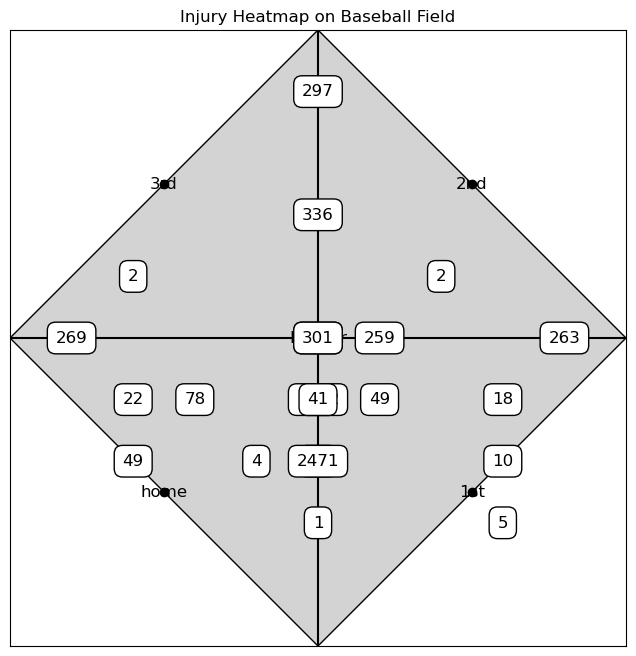

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import pandas as pd

# Define positions and their corresponding injury counts
total_injuries_by_position = {
    '1B': 269,
    '1B/3B': 22,
    '1B/OF': 49,
    '2B': 216,
    '2B/OF': 4,
    '3B': 263,
    '3B/1B': 18,
    '3B/OF': 10,
    'C': 297,
    'C/1B': 2,
    'C/OF': 2,
    'DH': 60,
    'INF': 301,
    'INF/OF': 259,
    'OF': 1193,
    'OF/1B': 78,
    'OF/INF': 49,
    'OF': 5,
    'RP': 1392,
    'RP/SP': 13,
    'SP': 2471,
    'SP/RP': 41,
    'SS': 336,
    'UTL': 1
}

# Define positions and their locations on the baseball field
position_locations = {
    'C': (0.5, 0.9),
    '1B': (0.1, 0.5),
    '2B': (0.5, 0.5),
    '3B': (0.9, 0.5),
    'SS': (0.5, 0.7),
    'OF': (0.8, 0.2),
    '1B/3B': (0.2, 0.4),
    '1B/OF': (0.2, 0.3),
    '2B/OF': (0.4, 0.3),
    '3B/1B': (0.8, 0.4),
    '3B/OF': (0.8, 0.3),
    'C/1B': (0.2, 0.6),
    'C/OF': (0.7, 0.6),
    'DH': (0.5, 0.4),
    'INF': (0.5, 0.5),
    'INF/OF': (0.6, 0.5),
    'OF/1B': (0.3, 0.4),
    'OF/INF': (0.6, 0.4),
    'UTL': (0.5, 0.2),
    'RP': (0.5, 0.4),
    'RP/SP': (0.5, 0.3),
    'SP': (0.5, 0.3),
    'SP/RP': (0.5, 0.4)
}

# Create a DataFrame for the heatmap
positions = list(total_injuries_by_position.keys())
injury_counts = list(total_injuries_by_position.values())

# Create a DataFrame with positions and their injury counts
heatmap_df = pd.DataFrame({
    'Position': positions,
    'Injury Count': injury_counts
})

# Create a base figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the baseball field
def draw_baseball_field(ax):
    # Draw the diamond
    diamond = patches.Polygon(((0.5, 0), (1, 0.5), (0.5, 1), (0, 0.5)), closed=True, edgecolor='black', facecolor='lightgray')
    ax.add_patch(diamond)
    
    # Draw the bases
    bases = {'1st': (0.75, 0.25), '2nd': (0.75, 0.75), '3rd': (0.25, 0.75), 'home': (0.25, 0.25)}
    for base, coord in bases.items():
        ax.plot(*coord, 'o', color='black')
        ax.text(coord[0], coord[1], base, fontsize=12, ha='center', va='center')

    # Draw the pitcher's mound
    ax.plot(0.5, 0.5, 'o', color='black')
    ax.text(0.5, 0.5, 'Pitcher', fontsize=12, ha='center', va='center')

    # Draw the infield and outfield lines
    ax.plot([0, 1], [0.5, 0.5], color='black')
    ax.plot([0.5, 0.5], [0, 1], color='black')

draw_baseball_field(ax)

# Plot the heatmap on the baseball field
for position, count in total_injuries_by_position.items():
    if position in position_locations:
        x, y = position_locations[position]
        ax.text(x, y, f'{count}', fontsize=12, ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
                color='black')

# Adjust plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Injury Heatmap on Baseball Field')

plt.show()


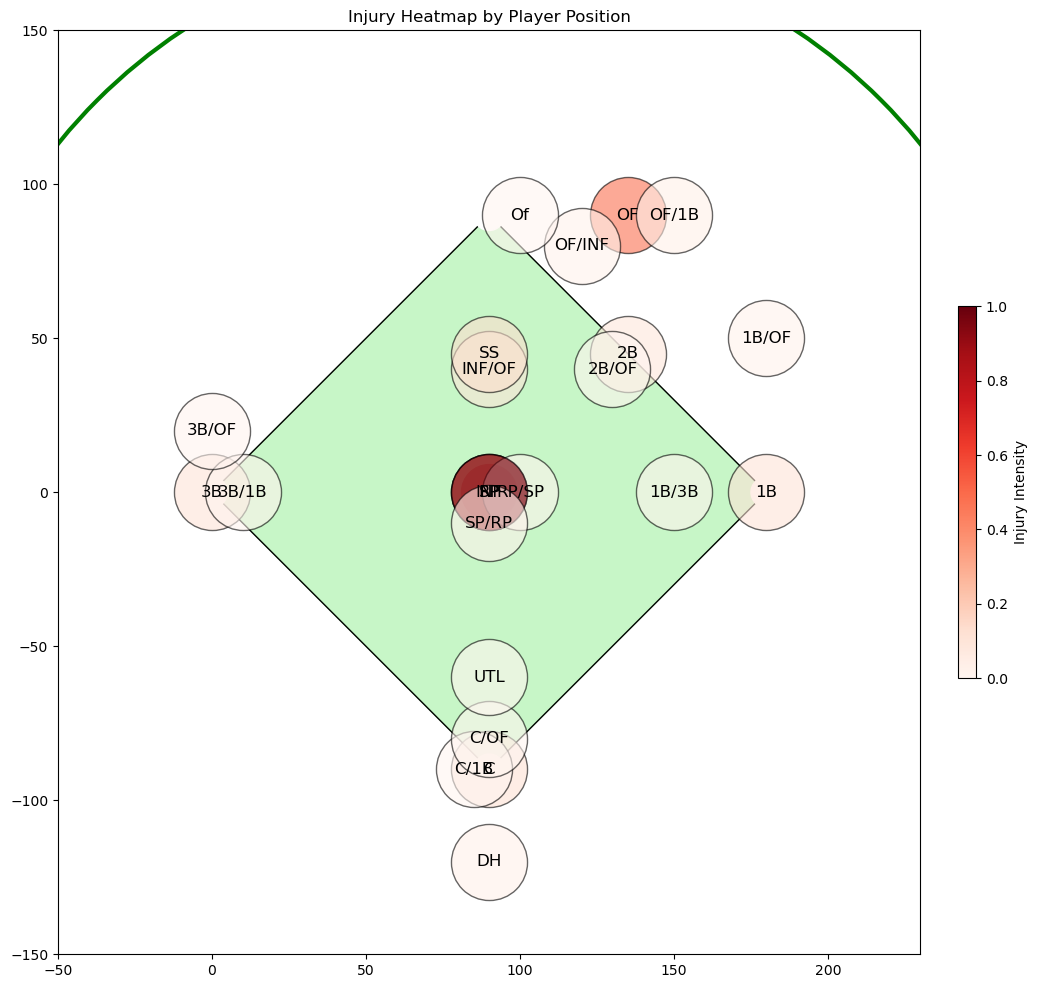

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm

# Total injuries by position
total_injuries_by_position = pd.Series({
    '1B': 269.0,
    '1B/3B': 22.0,
    '1B/OF': 49.0,
    '2B': 216.0,
    '2B/OF': 4.0,
    '3B': 263.0,
    '3B/1B': 18.0,
    '3B/OF': 10.0,
    'C': 297.0,
    'C/1B': 2.0,
    'C/OF': 2.0,
    'DH': 60.0,
    'INF': 301.0,
    'INF/OF': 259.0,
    'OF': 1193.0,
    'OF/1B': 78.0,
    'OF/INF': 49.0,
    'Of': 5.0,
    'RP': 1392.0,
    'RP/SP': 13.0,
    'SP': 2471.0,
    'SP/RP': 41.0,
    'SS': 336.0,
    'UTL': 1.0
})

# Define positions and their coordinates on the field (X, Y)
positions = {
    '1B': (180, 0),
    '1B/3B': (150, 0),
    '1B/OF': (180, 50),
    '2B': (135, 45),
    '2B/OF': (130, 40),
    '3B': (0, 0),
    '3B/1B': (10, 0),
    '3B/OF': (0, 20),
    'C': (90, -90),
    'C/1B': (85, -90),
    'C/OF': (90, -80),
    'DH': (90, -120),
    'INF': (90, 0),
    'INF/OF': (90, 40),
    'OF': (135, 90),
    'OF/1B': (150, 90),
    'OF/INF': (120, 80),
    'Of': (100, 90),
    'RP': (90, 0),
    'RP/SP': (100, 0),
    'SP': (90, 0),
    'SP/RP': (90, -10),
    'SS': (90, 45),
    'UTL': (90, -60)
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity
norm_injuries = total_injuries_by_position / total_injuries_by_position.max()

# Create a heatmap over the field
for position, (x, y) in positions.items():
    injury_count = norm_injuries.get(position, 0)
    ax.scatter(x, y, s=3000, color=cm.Reds(injury_count), alpha=0.6, edgecolor='black')

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

plt.title('Injury Heatmap by Player Position')
plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap=cm.Reds), ax=ax, orientation='vertical', fraction=0.02, pad=0.04, label='Injury Intensity')
plt.show()


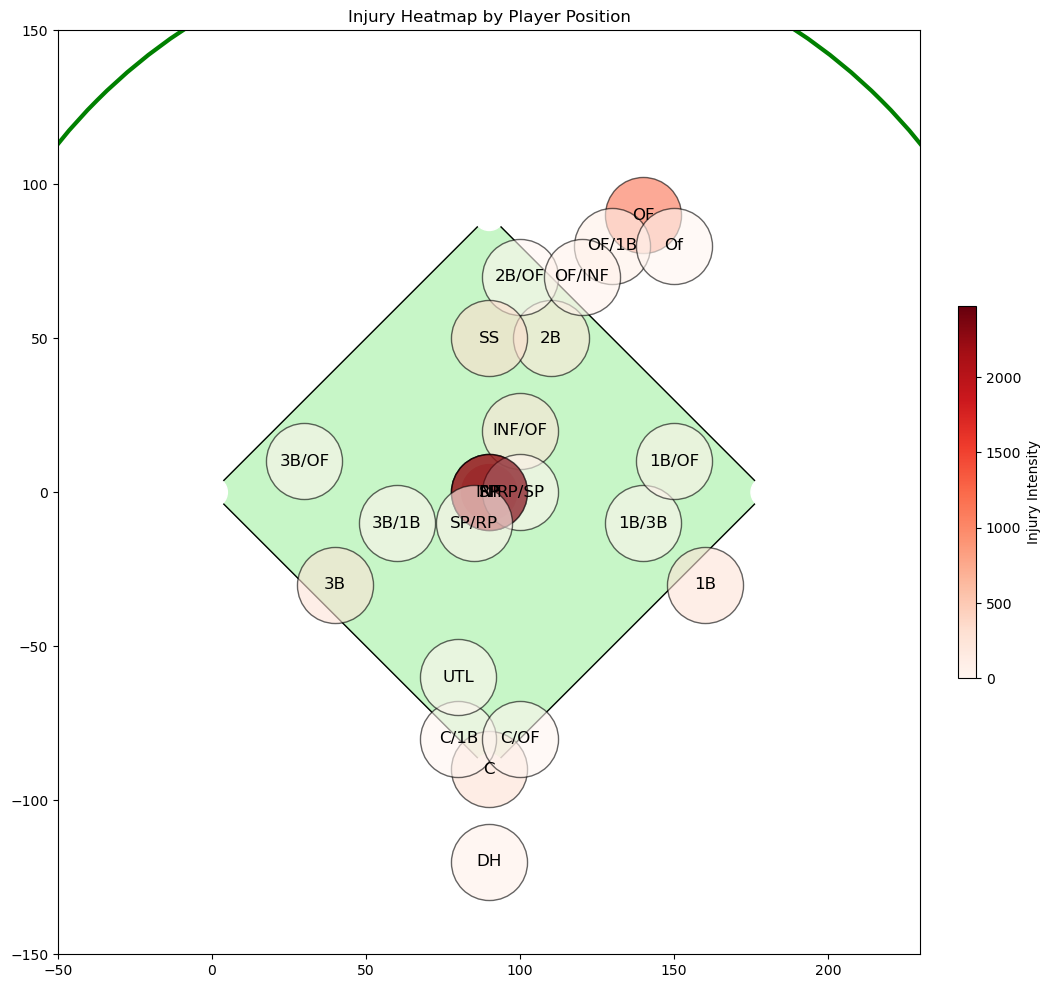

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize

# Total injuries by position
total_injuries_by_position = pd.Series({
    '1B': 269.0,
    '1B/3B': 22.0,
    '1B/OF': 49.0,
    '2B': 216.0,
    '2B/OF': 4.0,
    '3B': 263.0,
    '3B/1B': 18.0,
    '3B/OF': 10.0,
    'C': 297.0,
    'C/1B': 2.0,
    'C/OF': 2.0,
    'DH': 60.0,
    'INF': 301.0,
    'INF/OF': 259.0,
    'OF': 1193.0,
    'OF/1B': 78.0,
    'OF/INF': 49.0,
    'Of': 5.0,
    'RP': 1392.0,
    'RP/SP': 13.0,
    'SP': 2471.0,
    'SP/RP': 41.0,
    'SS': 336.0,
    'UTL': 1.0
})

# Define positions and their coordinates on the field (X, Y)
positions = {
    '1B': (160, -30),
    '1B/3B': (140, -10),
    '1B/OF': (150, 10),
    '2B': (110, 50),
    '2B/OF': (100, 70),
    '3B': (40, -30),
    '3B/1B': (60, -10),
    '3B/OF': (30, 10),
    'C': (90, -90),
    'C/1B': (80, -80),
    'C/OF': (100, -80),
    'DH': (90, -120),
    'INF': (90, 0),
    'INF/OF': (100, 20),
    'OF': (140, 90),
    'OF/1B': (130, 80),
    'OF/INF': (120, 70),
    'Of': (150, 80),
    'RP': (90, 0),
    'RP/SP': (100, 0),
    'SP': (90, 0),
    'SP/RP': (85, -10),
    'SS': (90, 50),
    'UTL': (80, -60)
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity
norm = Normalize(vmin=0, vmax=total_injuries_by_position.max())
cmap = cm.Reds

# Create a heatmap over the field
for position, (x, y) in positions.items():
    injury_count = total_injuries_by_position.get(position, 0)
    color = cmap(norm(injury_count))
    ax.scatter(x, y, s=3000, color=color, alpha=0.6, edgecolor='black')

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

# Add colorbar to indicate intensity scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04, label='Injury Intensity')

plt.title('Injury Heatmap by Player Position')
plt.show()


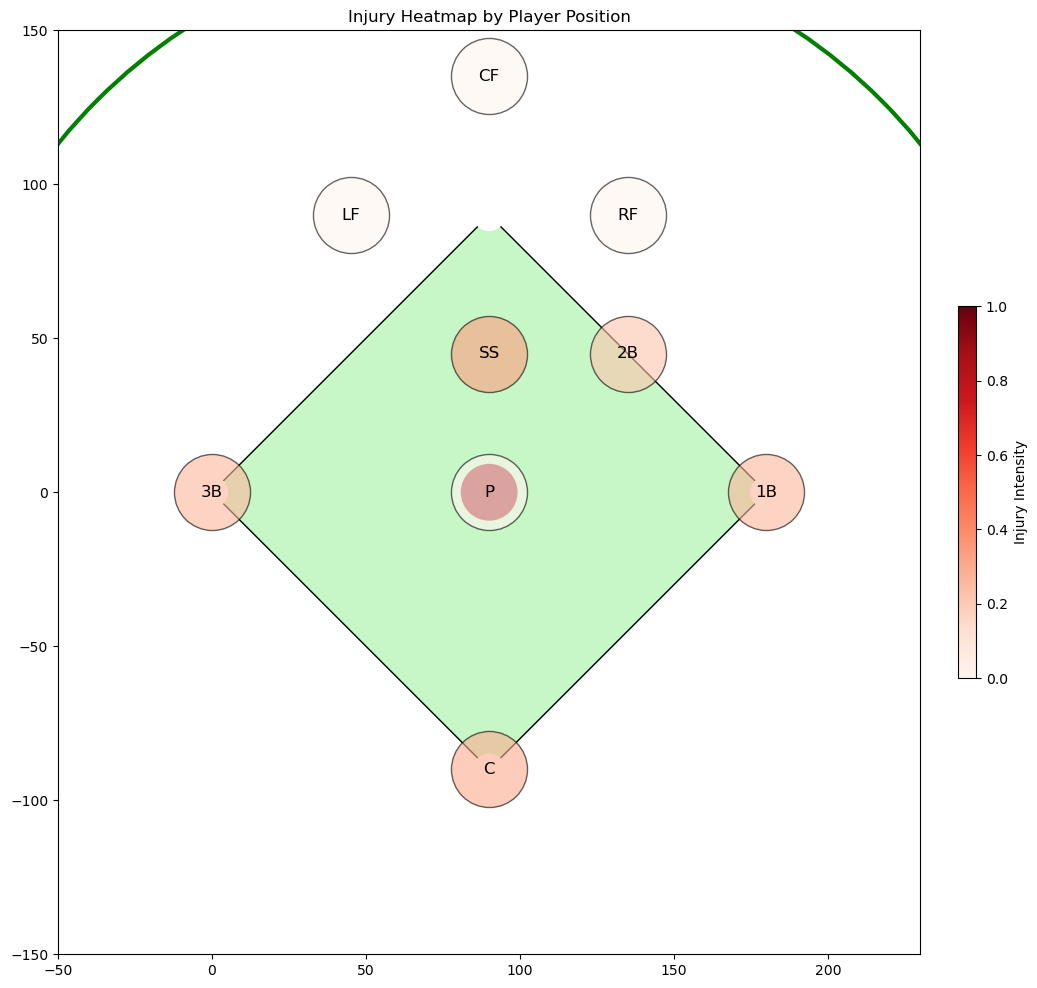

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib import cm, colors

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Adjust the scale so that the maximum injury value corresponds to 1000
max_injury_count = 1000
scaled_injuries = total_injuries_by_position.clip(upper=max_injury_count) / max_injury_count

# Position coordinates on the field (X, Y)
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Create a heatmap over the field
for position, (x, y) in positions.items():
    injury_count = scaled_injuries.get(position, 0)
    color = cm.Reds(injury_count)  # Use the scaled value to get the color
    ax.scatter(x, y, s=3000, color=color, alpha=0.6, edgecolor='black')

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

# Add color bar
norm = colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity')

plt.title('Injury Heatmap by Player Position')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\1818793998.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')  # You can choose a different colormap if needed


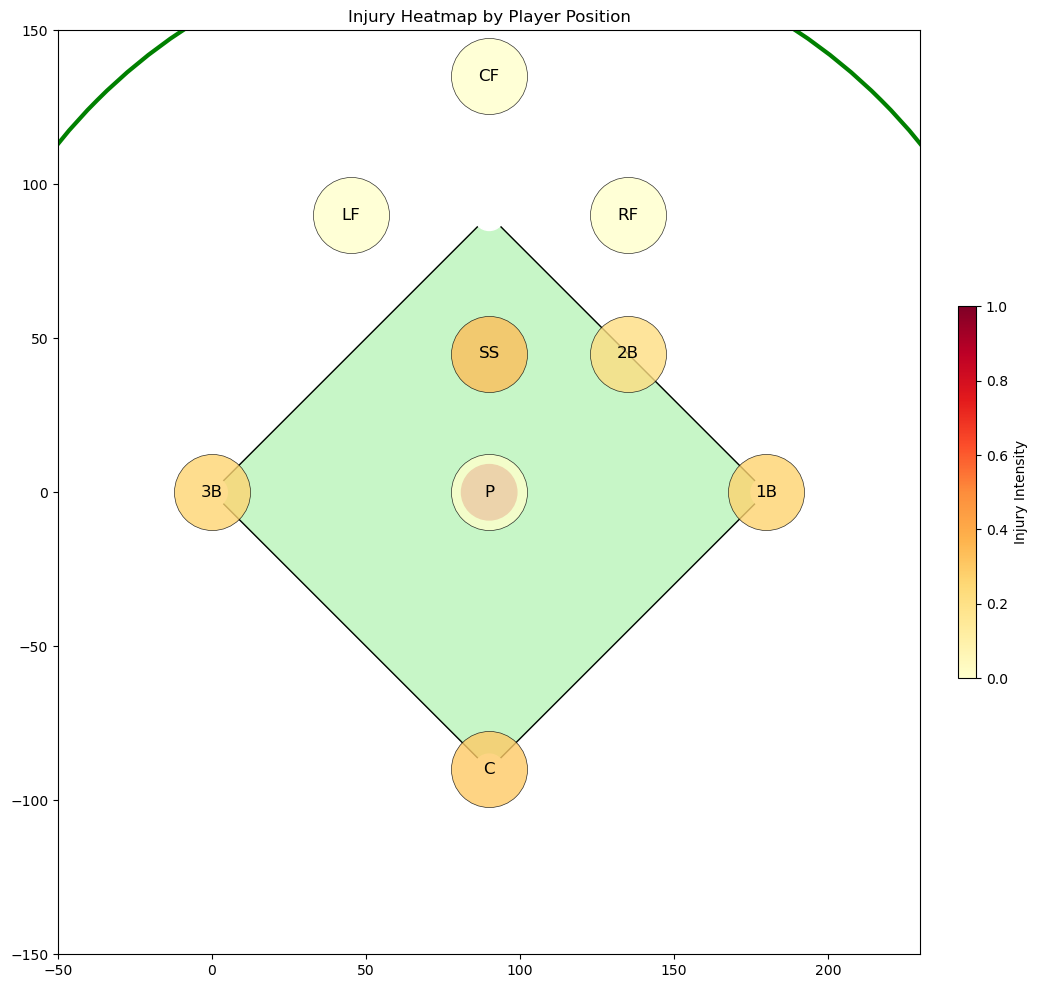

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import numpy as np

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Position coordinates on the field (X, Y)
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity with maximum set to 1000
max_injuries = 1000
norm_injuries = np.clip(total_injuries_by_position / max_injuries, 0, 1)

# Create a heatmap over the field with a more distinct colormap
cmap = cm.get_cmap('YlOrRd')  # You can choose a different colormap if needed
for position, (x, y) in positions.items():
    injury_count = total_injuries_by_position.get(position, 0)
    color = cmap(norm_injuries.get(position, 0))
    ax.scatter(x, y, s=3000, color=color, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity')

plt.title('Injury Heatmap by Player Position')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\1464853464.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')  # Use a colormap with a wide range of colors


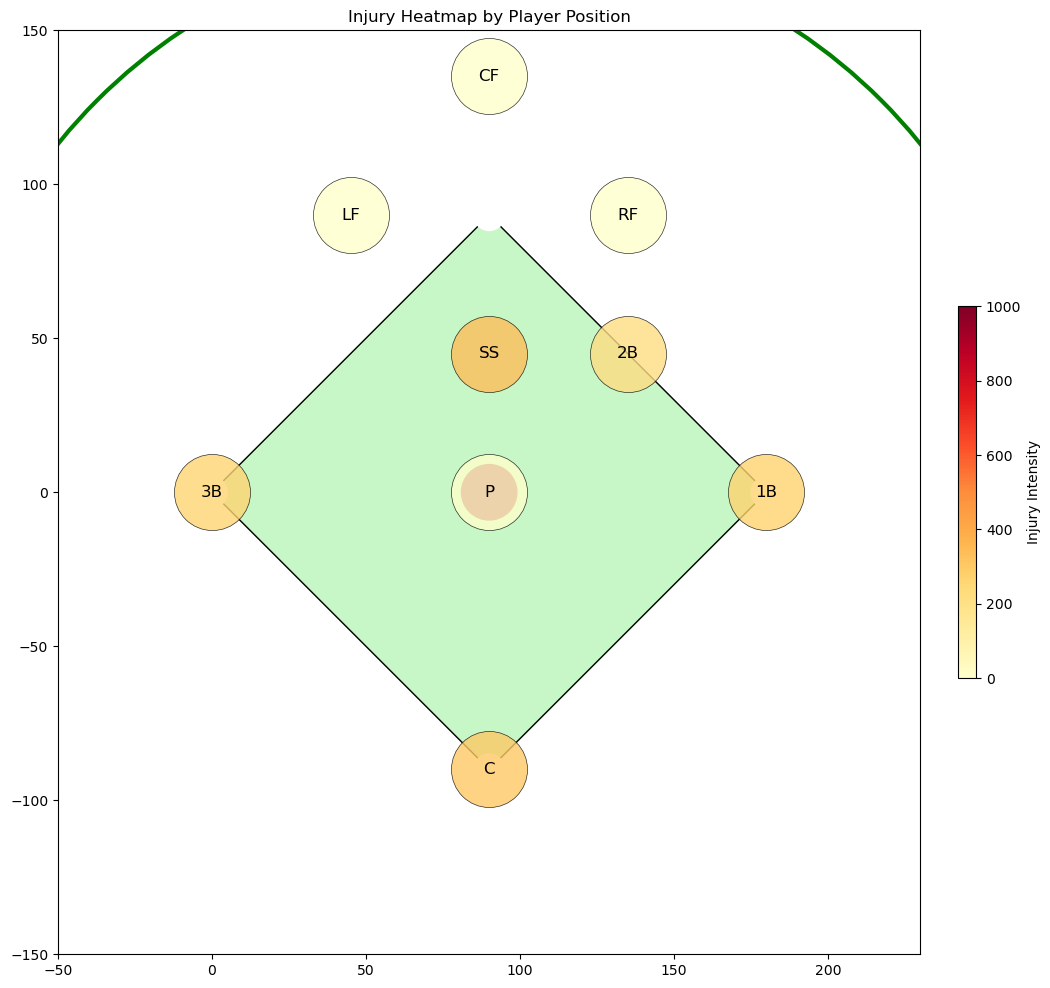

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Position coordinates on the field (X, Y) - Adjusted for better spacing
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity
max_injuries = total_injuries_by_position.max()
normalized_max = min(max_injuries, 1000)  # Use 1000 as the max value for normalization to enhance color differences
norm = Normalize(vmin=0, vmax=normalized_max)  # Normalize based on adjusted max injuries
cmap = cm.get_cmap('YlOrRd')  # Use a colormap with a wide range of colors

# Create a heatmap over the field with a distinct colormap
for position, (x, y) in positions.items():
    injury_count = total_injuries_by_position.get(position, 0)
    color = cmap(norm(injury_count))  # Apply normalization and color map
    ax.scatter(x, y, s=3000, color=color, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=normalized_max))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity')

plt.title('Injury Heatmap by Player Position')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\2090070385.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Use a colormap with strong color differentiation


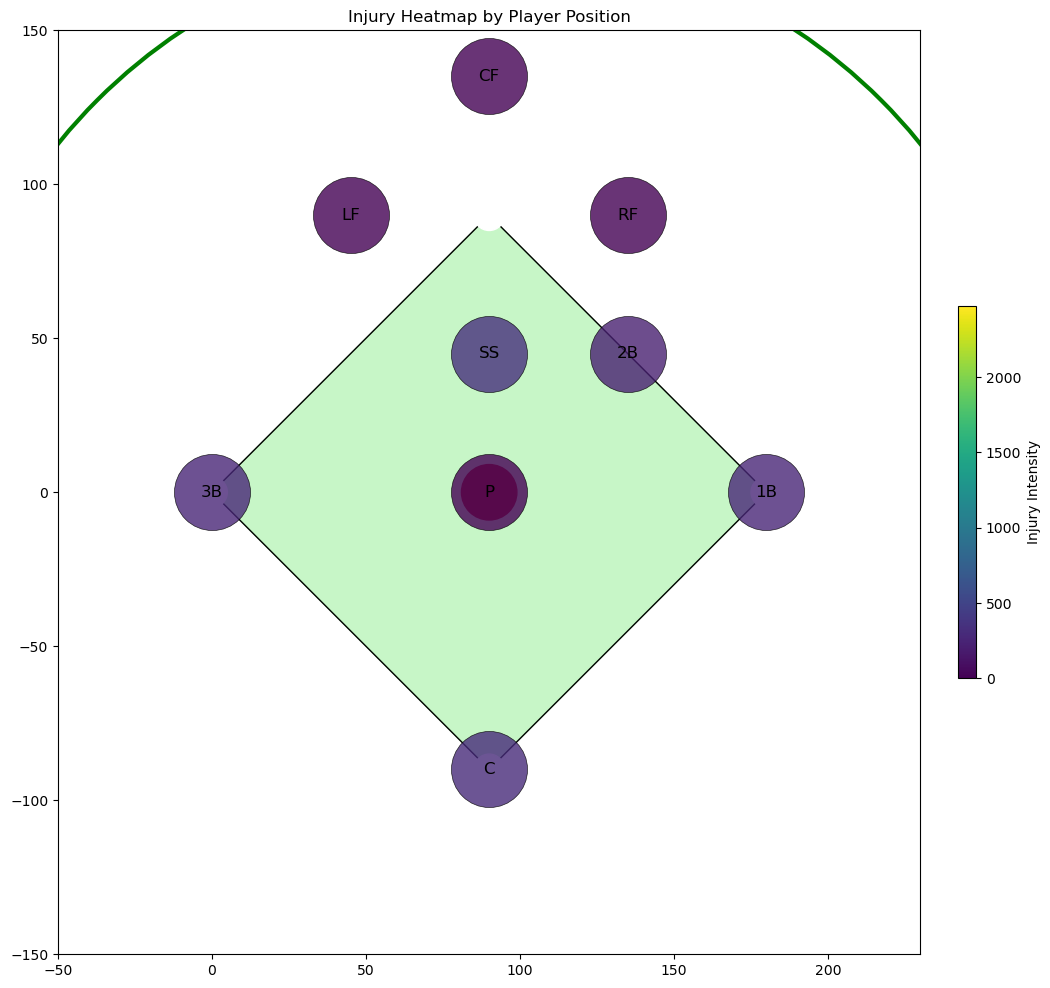

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize

# File paths for the CSV files
file_path_1 = r"C:\Users\alexi\Desktop\CombinedBPI.csv"
file_path_2 = r"C:\Users\alexi\Desktop\injury_report_cleaned.csv"

# Read the CSV files into DataFrames
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Clean data by removing rows with NaN values in critical columns
df1_cleaned = df1.dropna(subset=['Injury / Surgery', 'Pos'])
df2_cleaned = df2.dropna(subset=['Injury / Surgery', 'Pos'])

# Combine the DataFrames
combined_df = pd.concat([df1_cleaned, df2_cleaned])

# Aggregate data by position and injury type
injuries_by_position = combined_df.groupby('Pos')['Injury / Surgery'].value_counts().unstack().fillna(0)

# Sum injuries of all types for each position
total_injuries_by_position = injuries_by_position.sum(axis=1)

# Position coordinates on the field (X, Y) - Adjusted for better spacing
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity
max_injuries = total_injuries_by_position.max()
norm = Normalize(vmin=0, vmax=max_injuries)  # Normalize based on actual max injuries
cmap = cm.get_cmap('viridis')  # Use a colormap with strong color differentiation

# Create a heatmap over the field with a distinct colormap
for position, (x, y) in positions.items():
    injury_count = total_injuries_by_position.get(position, 0)
    color = cmap(norm(injury_count))  # Apply normalization and color map
    ax.scatter(x, y, s=3000, color=color, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add position labels
for position, (x, y) in positions.items():
    ax.text(x, y, position, fontsize=12, ha='center', va='center', color='black')

# Add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity')

plt.title('Injury Heatmap by Player Position')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\3414319021.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


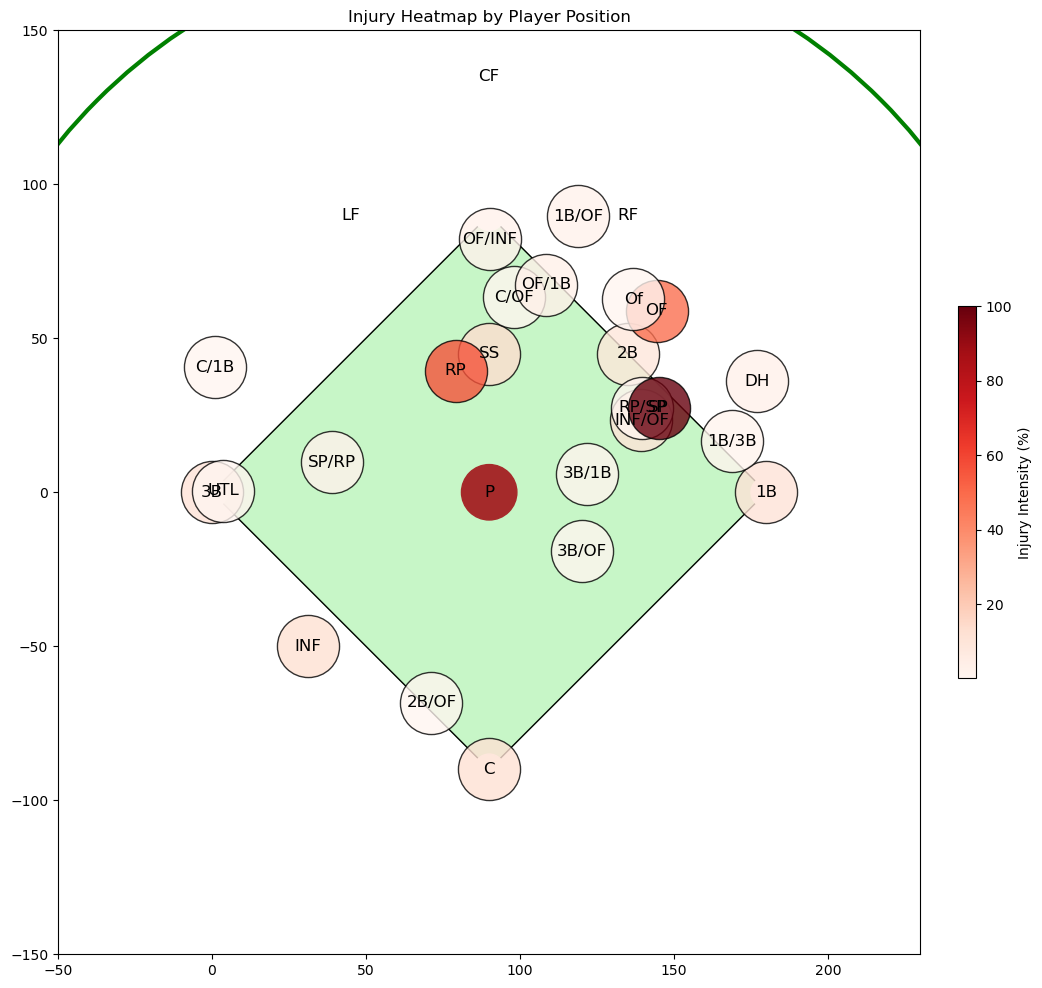

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize

# Data
data = {
    'Pos': ['1B', '1B/3B', '1B/OF', '2B', '2B/OF', '3B', '3B/1B', '3B/OF', 'C', 'C/1B', 'C/OF', 'DH', 'INF', 'INF/OF', 'OF', 'OF/1B', 'OF/INF', 'Of', 'RP', 'RP/SP', 'SP', 'SP/RP', 'SS', 'UTL'],
    'Injuries': [269, 22, 49, 216, 4, 263, 18, 10, 297, 2, 2, 60, 301, 259, 1193, 78, 49, 5, 1392, 13, 2471, 41, 336, 1]
}

df = pd.DataFrame(data)

# Normalize injury data to percentage scale
max_injuries = df['Injuries'].max()
df['Percentage'] = (df['Injuries'] / max_injuries) * 100

# Position coordinates on the field (X, Y) for better visualization
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Update the positions dictionary to include all injury positions
for pos in df['Pos']:
    if pos not in positions:
        positions[pos] = (np.random.uniform(0, 180), np.random.uniform(-90, 90))  # Random positions for missing

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity (0-1)
norm = Normalize(vmin=df['Percentage'].min(), vmax=df['Percentage'].max())

# Create a colormap for better color differentiation
cmap = cm.get_cmap('Reds')

# Plot heatmap for each position
for pos, (x, y) in positions.items():
    percentage = df[df['Pos'] == pos]['Percentage']
    if not percentage.empty:
        color = cmap(norm(percentage.values[0]))
        ax.scatter(x, y, s=2000, color=color, alpha=0.8, edgecolor='black')

# Add position labels
for pos, (x, y) in positions.items():
    ax.text(x, y, pos, fontsize=12, ha='center', va='center', color='black')

plt.title('Injury Heatmap by Player Position')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity (%)')
plt.show()

C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\2476247614.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


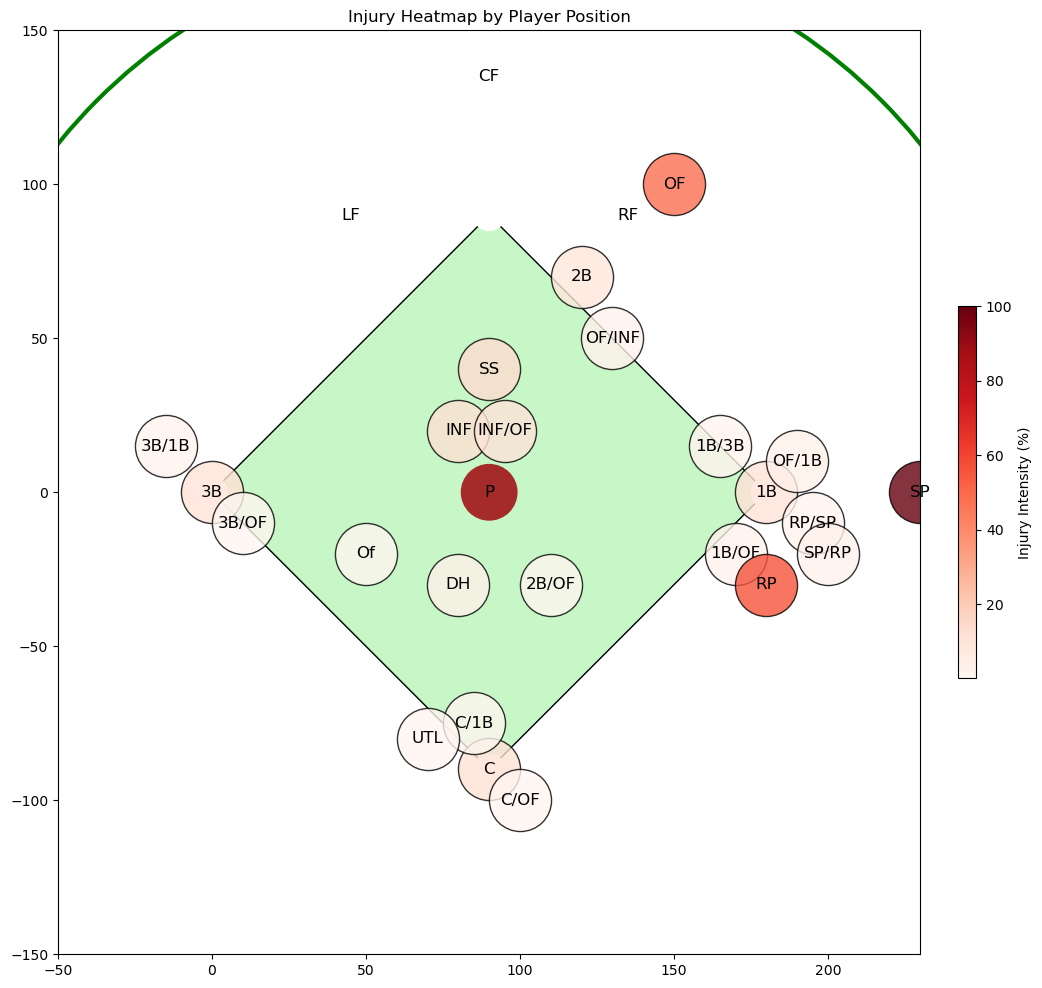

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

# Data
data = {
    'Pos': ['1B', '1B/3B', '1B/OF', '2B', '2B/OF', '3B', '3B/1B', '3B/OF', 'C', 'C/1B', 'C/OF', 'DH', 'INF', 'INF/OF', 'OF', 'OF/1B', 'OF/INF', 'Of', 'RP', 'RP/SP', 'SP', 'SP/RP', 'SS', 'UTL'],
    'Injuries': [269, 22, 49, 216, 4, 263, 18, 10, 297, 2, 2, 60, 301, 259, 1193, 78, 49, 5, 1392, 13, 2471, 41, 336, 1]
}

df = pd.DataFrame(data)

# Normalize injury data to percentage scale
max_injuries = df['Injuries'].max()
df['Percentage'] = (df['Injuries'] / max_injuries) * 100

# Position coordinates on the field (X, Y) for better visualization
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Additional positions for non-overlapping
extra_positions = {
    '1B/3B': (165, 15),
    '1B/OF': (170, -20),
    '2B': (120, 70),
    '2B/OF': (110, -30),
    '3B/1B': (-15, 15),
    '3B/OF': (10, -10),
    'C/1B': (85, -75),
    'C/OF': (100, -100),
    'DH': (80, -30),
    'INF': (80, 20),
    'INF/OF': (95, 20),
    'OF': (150, 100),
    'OF/1B': (190, 10),
    'OF/INF': (130, 50),
    'Of': (50, -20),
    'RP': (180, -30),
    'RP/SP': (195, -10),
    'SP': (230, 0),
    'SP/RP': (200, -20),
    'SS': (90, 40),
    'UTL': (70, -80)
}

# Merge dictionaries to ensure all positions are included
positions.update(extra_positions)

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity (0-1)
norm = Normalize(vmin=df['Percentage'].min(), vmax=df['Percentage'].max())

# Create a colormap for better color differentiation
cmap = cm.get_cmap('Reds')

# Plot heatmap for each position
for pos, (x, y) in positions.items():
    percentage = df[df['Pos'] == pos]['Percentage']
    if not percentage.empty:
        color = cmap(norm(percentage.values[0]))
        ax.scatter(x, y, s=2000, color=color, alpha=0.8, edgecolor='black')

# Add position labels
for pos, (x, y) in positions.items():
    ax.text(x, y, pos, fontsize=12, ha='center', va='center', color='black')

plt.title('Injury Heatmap by Player Position')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity (%)')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\1316146142.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


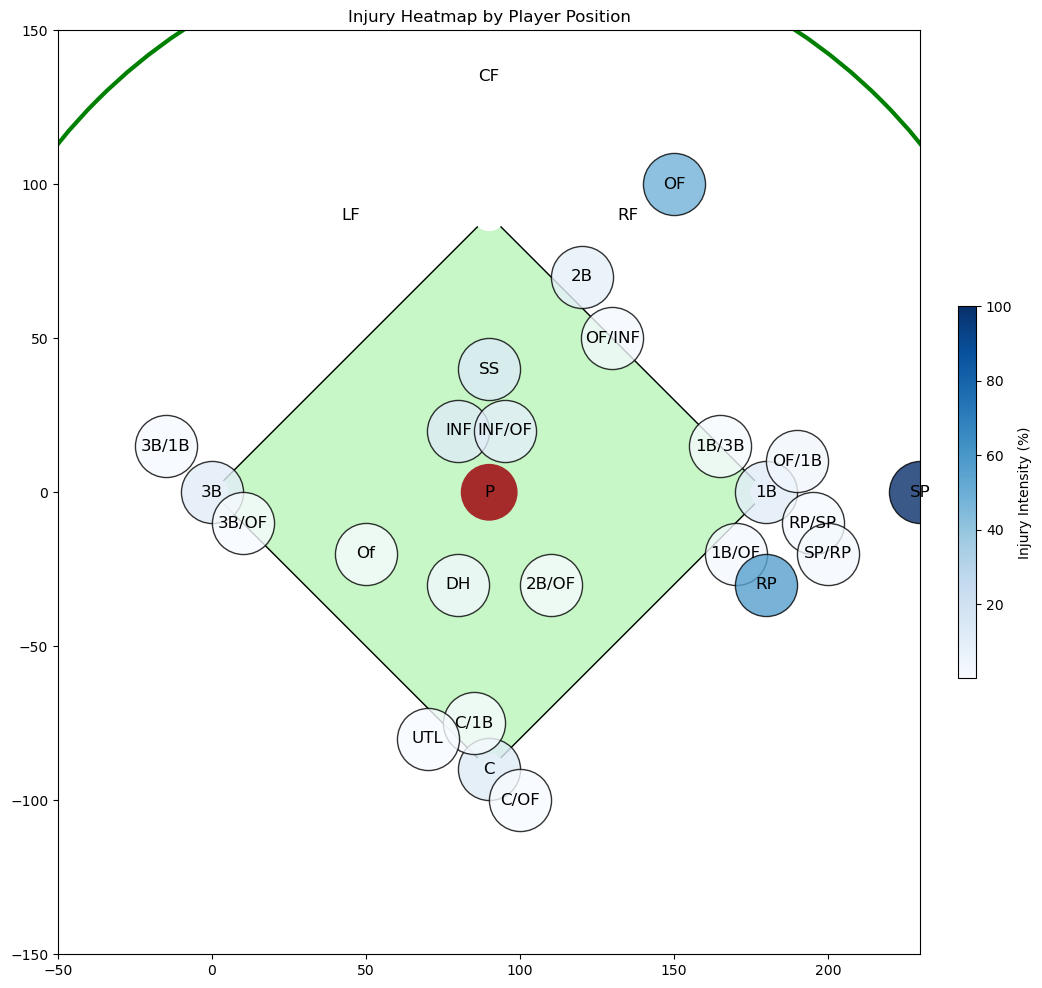

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

# Data
data = {
    'Pos': ['1B', '1B/3B', '1B/OF', '2B', '2B/OF', '3B', '3B/1B', '3B/OF', 'C', 'C/1B', 'C/OF', 'DH', 'INF', 'INF/OF', 'OF', 'OF/1B', 'OF/INF', 'Of', 'RP', 'RP/SP', 'SP', 'SP/RP', 'SS', 'UTL'],
    'Injuries': [269, 22, 49, 216, 4, 263, 18, 10, 297, 2, 2, 60, 301, 259, 1193, 78, 49, 5, 1392, 13, 2471, 41, 336, 1]
}

df = pd.DataFrame(data)

# Normalize injury data to percentage scale
max_injuries = df['Injuries'].max()
df['Percentage'] = (df['Injuries'] / max_injuries) * 100

# Position coordinates on the field (X, Y) for better visualization
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Additional positions for non-overlapping
extra_positions = {
    '1B/3B': (165, 15),
    '1B/OF': (170, -20),
    '2B': (120, 70),
    '2B/OF': (110, -30),
    '3B/1B': (-15, 15),
    '3B/OF': (10, -10),
    'C/1B': (85, -75),
    'C/OF': (100, -100),
    'DH': (80, -30),
    'INF': (80, 20),
    'INF/OF': (95, 20),
    'OF': (150, 100),
    'OF/1B': (190, 10),
    'OF/INF': (130, 50),
    'Of': (50, -20),
    'RP': (180, -30),
    'RP/SP': (195, -10),
    'SP': (230, 0),
    'SP/RP': (200, -20),
    'SS': (90, 40),
    'UTL': (70, -80)
}

# Merge dictionaries to ensure all positions are included
positions.update(extra_positions)

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity (0-1)
norm = Normalize(vmin=df['Percentage'].min(), vmax=df['Percentage'].max())

# Create a colormap for better color differentiation in blue shades
cmap = cm.get_cmap('Blues')

# Plot heatmap for each position
for pos, (x, y) in positions.items():
    percentage = df[df['Pos'] == pos]['Percentage']
    if not percentage.empty:
        color = cmap(norm(percentage.values[0]))
        ax.scatter(x, y, s=2000, color=color, alpha=0.8, edgecolor='black')

# Add position labels
for pos, (x, y) in positions.items():
    ax.text(x, y, pos, fontsize=12, ha='center', va='center', color='black')

plt.title('Injury Heatmap by Player Position')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity (%)')
plt.show()


C:\Users\alexi\AppData\Local\Temp\ipykernel_25564\2442969002.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


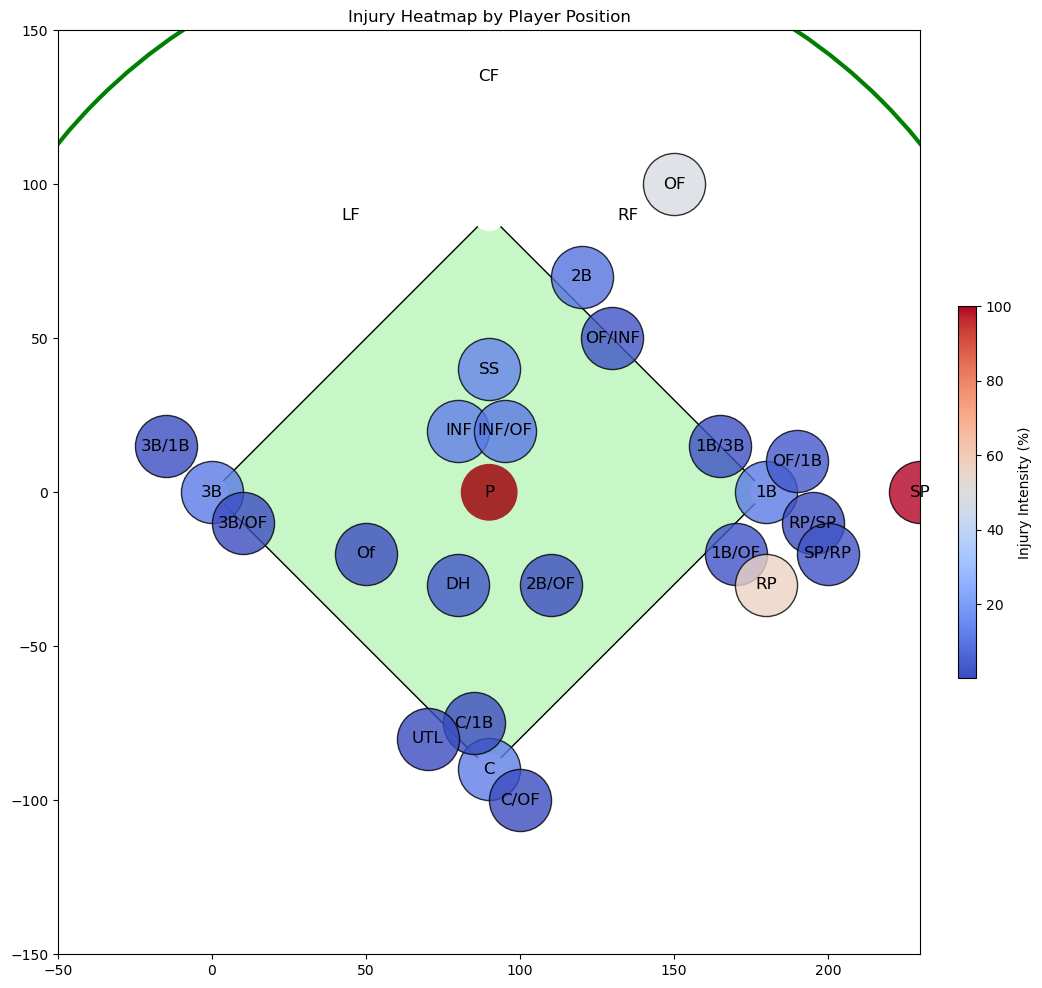

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import Normalize

# Data
data = {
    'Pos': ['1B', '1B/3B', '1B/OF', '2B', '2B/OF', '3B', '3B/1B', '3B/OF', 'C', 'C/1B', 'C/OF', 'DH', 'INF', 'INF/OF', 'OF', 'OF/1B', 'OF/INF', 'Of', 'RP', 'RP/SP', 'SP', 'SP/RP', 'SS', 'UTL'],
    'Injuries': [269, 22, 49, 216, 4, 263, 18, 10, 297, 2, 2, 60, 301, 259, 1193, 78, 49, 5, 1392, 13, 2471, 41, 336, 1]
}

df = pd.DataFrame(data)

# Normalize injury data to percentage scale
max_injuries = df['Injuries'].max()
df['Percentage'] = (df['Injuries'] / max_injuries) * 100

# Position coordinates on the field (X, Y) for better visualization
positions = {
    'P': (90, 0),     # Pitcher
    'C': (90, -90),   # Catcher
    '1B': (180, 0),   # First Base
    '2B': (135, 45),  # Second Base
    '3B': (0, 0),     # Third Base
    'SS': (90, 45),   # Shortstop
    'LF': (45, 90),   # Left Field
    'CF': (90, 135),  # Center Field
    'RF': (135, 90)   # Right Field
}

# Additional positions for non-overlapping
extra_positions = {
    '1B/3B': (165, 15),
    '1B/OF': (170, -20),
    '2B': (120, 70),
    '2B/OF': (110, -30),
    '3B/1B': (-15, 15),
    '3B/OF': (10, -10),
    'C/1B': (85, -75),
    'C/OF': (100, -100),
    'DH': (80, -30),
    'INF': (80, 20),
    'INF/OF': (95, 20),
    'OF': (150, 100),
    'OF/1B': (190, 10),
    'OF/INF': (130, 50),
    'Of': (50, -20),
    'RP': (180, -30),
    'RP/SP': (195, -10),
    'SP': (230, 0),
    'SP/RP': (200, -20),
    'SS': (90, 40),
    'UTL': (70, -80)
}

# Merge dictionaries to ensure all positions are included
positions.update(extra_positions)

# Draw the baseball field
def draw_baseball_field():
    fig, ax = plt.subplots(figsize=(12, 12))

    # Basepaths
    basepath = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=True, color='lightgreen', alpha=0.5)
    ax.add_patch(basepath)

    # Infield
    infield = patches.Polygon(((0, 0), (90, 90), (180, 0), (90, -90)), closed=True, fill=False, edgecolor='black')
    ax.add_patch(infield)

    # Pitcher's mound
    mound = patches.Circle((90, 0), radius=9, fill=True, color='brown')
    ax.add_patch(mound)

    # Bases
    base_radius = 5
    first_base = patches.Circle((180, 0), radius=base_radius, fill=True, color='white')
    second_base = patches.Circle((90, 90), radius=base_radius, fill=True, color='white')
    third_base = patches.Circle((0, 0), radius=base_radius, fill=True, color='white')
    home_plate = patches.Circle((90, -90), radius=base_radius, fill=True, color='white')

    ax.add_patch(first_base)
    ax.add_patch(second_base)
    ax.add_patch(third_base)
    ax.add_patch(home_plate)

    # Outfield
    outfield = patches.Arc((90, 0), 360, 360, angle=0, theta1=0, theta2=180, edgecolor='green', lw=3)
    ax.add_patch(outfield)

    # Set limits and aspect
    ax.set_xlim(-50, 230)
    ax.set_ylim(-150, 150)
    ax.set_aspect('equal')

    return fig, ax

# Plot the baseball field
fig, ax = draw_baseball_field()

# Normalize the injury data for heatmap intensity (0-1)
norm = Normalize(vmin=df['Percentage'].min(), vmax=df['Percentage'].max())

# Create a colormap for blue to red gradient
cmap = cm.get_cmap('coolwarm')

# Plot heatmap for each position
for pos, (x, y) in positions.items():
    percentage = df[df['Pos'] == pos]['Percentage']
    if not percentage.empty:
        color = cmap(norm(percentage.values[0]))
        ax.scatter(x, y, s=2000, color=color, alpha=0.8, edgecolor='black')

# Add position labels
for pos, (x, y) in positions.items():
    ax.text(x, y, pos, fontsize=12, ha='center', va='center', color='black')

plt.title('Injury Heatmap by Player Position')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Injury Intensity (%)')
plt.show()
